# Introduction

We are a Team 35 - Junjie Qian, Meng Shen, and Tsz Lung Chan. We present here our insights into the Airbnb data. We focus on Boston’s data, for the very reason that some members studied or worked in Boston. Our main objective would be to assist Boston-based property investors’ decision making process by analyzing the rental data through short-term rental platforms like Airbnb. To this end, we need to answer the following question through our analysis:

* What are the main factors that influence Airbnb daily renting price?

# Data Import

The data is sourced from the [Inside Airbnb](http://insideairbnb.com/get-the-data.html) website which hosts publicly available data from the Airbnb site. The owners of the website have scraped data from AirBnB listings and aggregated it into data sets for various cities across the USA and the world. The latest data (from 09 February, 2019) covers 6,155 listings on AirBnB in Boston. Detailed listings data showing 106 features for each of the listings.

In [16]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import scikitplot as skplt
import statsmodels.api as sm
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
from geopy.distance import vincenty
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load listings data
Boston_listings0 = pd.read_csv(r'C:\Users\junjq\OneDrive\Documents\GitHub\final-project-magicteam\data\Boston_listings.csv')
Boston_listings0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Columns: 106 entries, id to reviews_per_month
dtypes: float64(25), int64(21), object(60)
memory usage: 5.0+ MB


In [3]:
# identify id and url features
id_url_cols = ['id',             
               'scrape_id',
               'host_id',
               'listing_url',
               'thumbnail_url',
               'medium_url',               
               'picture_url',
               'xl_picture_url',
               'host_url',
               'host_thumbnail_url',
               'host_picture_url',
               'zipcode']
Boston_listings0[id_url_cols].head()

,id,scrape_id,host_id,listing_url,thumbnail_url,medium_url,picture_url,xl_picture_url,host_url,host_thumbnail_url,host_picture_url,zipcode
0,3781,20190209175027,4804,https://www.airbnb.com/rooms/3781,NaN,NaN,https://a0.muscache.com/im/pictures/24670/b2de...,NaN,https://www.airbnb.com/users/show/4804,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,02128
1,5506,20190209175027,8229,https://www.airbnb.com/rooms/5506,NaN,NaN,https://a0.muscache.com/im/pictures/1598e8b6-5...,NaN,https://www.airbnb.com/users/show/8229,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/im/users/8229/profile_...,02119
2,6695,20190209175027,8229,https://www.airbnb.com/rooms/6695,NaN,NaN,https://a0.muscache.com/im/pictures/38ac4797-e...,NaN,https://www.airbnb.com/users/show/8229,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/im/users/8229/profile_...,02119
3,6976,20190209175027,16701,https://www.airbnb.com/rooms/6976,NaN,NaN,https://a0.muscache.com/im/pictures/85bf0653-b...,NaN,https://www.airbnb.com/users/show/16701,https://a0.muscache.com/im/pictures/d9075ba6-7...,https://a0.muscache.com/im/pictures/d9075ba6-7...,02131
4,8789,20190209175027,26988,https://www.airbnb.com/rooms/8789,NaN,NaN,https://a0.muscache.com/im/pictures/32210/7fdd...,NaN,https://www.airbnb.com/users/show/26988,https://a0.muscache.com/im/pictures/user/d7d71...,https://a0.muscache.com/im/pictures/user/d7d71...,02108


In [4]:
# identify datetime features
datetime_cols = ['last_scraped',                 
                 'calendar_last_scraped',
                 'host_since',
                 'first_review',
                 'last_review']
Boston_listings0[datetime_cols].head()

,last_scraped,calendar_last_scraped,host_since,first_review,last_review
0,2019-02-09,2019-02-09,2008-12-03,2015-07-10,2018-07-02
1,2019-02-09,2019-02-09,2009-02-19,2009-03-21,2018-11-18
2,2019-02-09,2019-02-09,2009-02-19,2009-08-06,2018-11-25
3,2019-02-09,2019-02-09,2009-05-11,2009-07-19,2018-10-23
4,2019-02-09,2019-02-09,2009-07-22,2014-08-12,2018-12-20


In [5]:
# identify textual features
textual_cols = ['name',
                'summary',
                'space',
                'description',
                'experiences_offered',
                'neighborhood_overview',
                'notes',
                'transit',
                'access',
                'interaction',
                'house_rules',
                'host_name',
                'host_location',
                'host_about',
                'host_response_time',
                'host_neighbourhood',
                'host_verifications',
                'street',
                'neighbourhood',
                'neighbourhood_cleansed',
                'neighbourhood_group_cleansed',
                'city',
                'state',
                'market',
                'smart_location',
                'country_code',
                'country',
                'property_type',
                'room_type',
                'bed_type',
                'amenities',
                'calendar_updated', 
                'cancellation_policy']
Boston_listings0[textual_cols].head()

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,...,market,smart_location,country_code,country,property_type,room_type,bed_type,amenities,calendar_updated,cancellation_policy
0,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",Building is on quiet side of airport. Building...,Local subway stop ( Maverick Station on the Bl...,Guests solely occupy the 1 floor apartment wit...,We sometimes travel. Always available via: mob...,...,Boston,"Boston, MA",US,United States,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",4 months ago,super_strict_30
1,**$79 Special ** Private! Minutes to center!,This is a private guest room with private bath...,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,This is a private guest room with private bath...,none,"Peacful, Architecturally interesting, historic...","Guest room is on the 3rd floor, Steps are req...","Excellent Access to all of Boston, Walk to Mus...",You get full access to the guest room with pri...,"We give guests privacy, but we are available ...",...,Boston,"Boston, MA",US,United States,Guest suite,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",today,strict_14_with_grace_period
2,$99 Special!! Home Away! Condo,NaN,** WELCOME *** FULL PRIVATE APARTMENT In a His...,** WELCOME *** FULL PRIVATE APARTMENT In a His...,none,"Peaceful, Architecturally interesting, histori...",Check out some of the other accommodations we ...,"We are a 5 minute walk to the subway, 5 minut...","Full Private apartment. 1 bedroom, kitchen, ...",NaN,...,Boston,"Boston, MA",US,United States,Condominium,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",today,strict_14_with_grace_period
3,Mexican Folk Art Haven in Boston Residential Area,Come stay with me in Boston's Roslindale neigh...,"This is a well-maintained, two-family house bu...",Come stay with me in Boston's Roslindale neigh...,none,The LOCATION: Roslindale is a safe and diverse...,"There is no smoking allowed, inside the apartm...","PUBLIC TRANSPORTATION: From the house, quick p...","You can have access to your room, the adjacent...",ABOUT ME: I am one of the original Boston AIRB...,...,Boston,"Boston, MA",US,United States,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",today,moderate
4,Curved Glass Studio/1bd facing Park,"Bright, 1 bed with curved glass windows facing...",Fully Furnished studio with enclosed bedroom. ...,"Bright, 1 bed with curved glass windows facing...",none,Beacon Hill is a historic neighborhood filled ...,Guests should expect to show government ID to ...,The MBTA site is a great reference for public ...,Guests have access to the full unit,I'm available for questions and/or issues.,...,Boston,"Boston, MA",US,United States,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",yesterday,strict_14_with_grace_period


In [6]:
# identify numeric features
numeric_cols = ['host_acceptance_rate',
                'host_listings_count',
                'host_total_listings_count',
                'neighbourhood_group_cleansed',
                'accommodates',
                'bathrooms',
                'bedrooms',
                'beds',
                'square_feet',
                'guests_included',
                'minimum_nights',
                'maximum_nights',
                'minimum_minimum_nights',
                'maximum_minimum_nights',
                'minimum_maximum_nights',
                'maximum_maximum_nights',
                'minimum_nights_avg_ntm',
                'maximum_nights_avg_ntm',
                'availability_30',
                'availability_60',
                'availability_90',
                'availability_365',
                'number_of_reviews',
                'number_of_reviews_ltm',
                'review_scores_rating',
                'review_scores_accuracy',
                'review_scores_cleanliness',
                'review_scores_checkin',
                'review_scores_communication',
                'review_scores_location',
                'review_scores_value',
                'license',
                'jurisdiction_names',
                'reviews_per_month',
                'calculated_host_listings_count',
                'calculated_host_listings_count_entire_homes',
                'calculated_host_listings_count_private_rooms',
                'calculated_host_listings_count_shared_rooms']
Boston_listings0[numeric_cols].head()

,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,...,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,reviews_per_month,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,NaN,4.0,4.0,NaN,2,1.0,1.0,1.0,NaN,2,...,10.0,10.0,10.0,NaN,NaN,0.32,1,1,0,0
1,NaN,6.0,6.0,NaN,2,1.0,1.0,1.0,225.0,1,...,10.0,9.0,10.0,NaN,NaN,0.66,6,6,0,0
2,NaN,6.0,6.0,NaN,4,1.0,1.0,2.0,NaN,2,...,10.0,9.0,9.0,NaN,NaN,0.73,6,6,0,0
3,NaN,1.0,1.0,NaN,2,1.0,1.0,1.0,NaN,1,...,10.0,9.0,10.0,NaN,NaN,0.64,1,0,1,0
4,NaN,11.0,11.0,NaN,2,1.0,1.0,1.0,NaN,1,...,10.0,10.0,9.0,NaN,NaN,0.40,10,10,0,0


# Data Wrangling

## Missing Values

The data has null values. As we see, the following features with missing% > 90%: 

  + host_acceptance_rate
  
  + thumbnail_url

  + neighbourhood_group_cleansed
 
  + jurisdiction_names
  
  + xl_picture_url
  
  + thumbnail_url

  + medium_url
 
  + square_feet
  
  + weekly_price
 
  + monthly_price
   
Therefore, it is worth to drop the rows and columns containing null values before performing further analysis.  

In [7]:
# check missing values
missing_data = Boston_listings0.isnull().sum(axis = 0).reset_index()
missing_data.columns = ['variable', 'missing values']
missing_data['missing%'] = missing_data['missing values'] / Boston_listings0.shape[0] * 100
missing_data_srt = missing_data.sort_values('missing%', ascending = False).reset_index(drop = True)
missing_data_srt[missing_data_srt['missing%'] > 0]

,variable,missing values,missing%
0,host_acceptance_rate,6155,100.000000
1,thumbnail_url,6155,100.000000
2,neighbourhood_group_cleansed,6155,100.000000
3,jurisdiction_names,6155,100.000000
4,license,6155,100.000000
5,xl_picture_url,6155,100.000000
6,medium_url,6155,100.000000
7,square_feet,6057,98.407799
8,weekly_price,5628,91.437855
9,monthly_price,5626,91.405361


## Feature Engineering 

Some of the features in the data does not contain data in the required format and hence are manipulated in a way that their meanings are retained.

### Convert string monetary values to numeric monetary values

Some string monetary values need to be converted into numeric monetary values. For example, look on price columns, they are strings because of '$' sign before the price:

In [8]:
# identify monetary features
monetary_cols = ['price', 
                 'weekly_price', 
                 'monthly_price', 
                 'security_deposit', 
                 'cleaning_fee', 
                 'extra_people']
Boston_listings0[monetary_cols].head()

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,$125.00,$750.00,"$2,250.00",$0.00,$75.00,$0.00
1,$145.00,$980.00,"$3,000.00",$0.00,$40.00,$0.00
2,$169.00,NaN,NaN,NaN,$70.00,$8.00
3,$65.00,$395.00,"$1,350.00",$0.00,$0.00,$30.00
4,$99.00,"$1,200.00","$2,900.00","$1,000.00",$250.00,$0.00


In [9]:
# define strPrice_to_numPrice function
def strPrice_to_numPrice(price_string):
    '''
    Converts USD prices from string to numeric format
    
    Args:
        price_string (string): USD price in string format (e.g., '$123,456.00')
    
    Returns:
        price_numeric (float): USD price in numeric format (e.g., 123456.00)
    '''
    
    price_numeric = float(str(price_string).replace(',', '').split('$')[-1])
    return price_numeric

In [10]:
# apply strPrice_to_numPrice function over monetary features
Boston_listings1 = Boston_listings0.copy()
for col in monetary_cols:
    Boston_listings1[col] = Boston_listings1[col].apply(strPrice_to_numPrice)
Boston_listings1[monetary_cols].head()

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,125.0,750.0,2250.0,0.0,75.0,0.0
1,145.0,980.0,3000.0,0.0,40.0,0.0
2,169.0,NaN,NaN,NaN,70.0,8.0
3,65.0,395.0,1350.0,0.0,0.0,30.0
4,99.0,1200.0,2900.0,1000.0,250.0,0.0


### Convert string boolean values to numeric boolean values

Also, some of the categorical columns are in fact Boolean and require conversion:

In [11]:
# identify boolean features
boolean_cols = ['host_is_superhost', 
                'host_has_profile_pic',
                'host_identity_verified',
                'is_location_exact',
                'has_availability',
                'requires_license',
                'instant_bookable',
                'is_business_travel_ready',
                'require_guest_profile_picture',
                'require_guest_phone_verification']
Boston_listings1[boolean_cols].head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,has_availability,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification
0,t,t,f,t,t,f,f,f,f,f
1,t,t,t,t,t,f,t,f,f,f
2,t,t,t,t,t,f,t,f,f,f
3,t,t,t,t,t,f,f,f,t,f
4,f,t,f,t,t,f,f,f,f,f


In [12]:
# define strBoolean_to_numBoolean function
def strBoolean_to_numBoolean(s):
    '''
    Converts "first letter boolean" strings to integers
    
    Args:
        bool_string (string): 't', 'f' or other
    
    Returns:
        bool_number (int): 1, 0 or None
    '''
        
    if s == 'f':
        return 0
    elif s == 't':
        return 1
    return None

In [13]:
# apply strBoolean_to_numBoolean function over boolean features
Boston_listings2 = Boston_listings1.copy()
for col in boolean_cols:
    Boston_listings2[col] = Boston_listings2[col].apply(strBoolean_to_numBoolean)
Boston_listings2[boolean_cols].head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,has_availability,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification
0,1.0,1.0,0.0,1,1,0,0,0,0,0
1,1.0,1.0,1.0,1,1,0,1,0,0,0
2,1.0,1.0,1.0,1,1,0,1,0,0,0
3,1.0,1.0,1.0,1,1,0,0,0,1,0
4,0.0,1.0,0.0,1,1,0,0,0,0,0


### Create location features

We want to add geographical distance to city center (Boston center's coordinates comes from [here](http://dateandtime.info/citycoordinates.php))

In [14]:
# sepecify coordinates of Boston
Boston_listings3 = Boston_listings2.copy()
Boston_listings3['lat_center'] = 42.3584300
Boston_listings3['lon_center'] = -71.0597700

In [17]:
# calculates vincenty distance
Boston_listings3['distance_to_center'] = Boston_listings3.apply(lambda x: vincenty((x['latitude'], x['longitude']), (x['lat_center'], x['lon_center'])).km, axis = 1)

In [18]:
# check neighbourhood
Boston_listings3['neighbourhood_cleansed'].value_counts()

Dorchester                 537
Jamaica Plain              514
Back Bay                   494
Downtown                   453
South End                  445
Fenway                     440
Brighton                   358
South Boston               338
Allston                    329
Roxbury                    319
East Boston                311
Beacon Hill                255
North End                  245
Mission Hill               214
Charlestown                156
West End                   154
Chinatown                  139
Roslindale                 117
South Boston Waterfront     76
Mattapan                    75
West Roxbury                70
Hyde Park                   59
Bay Village                 39
Longwood Medical Area       11
Leather District             7
Name: neighbourhood_cleansed, dtype: int64

In [19]:
# check mean distance by neighbourhood
Boston_listings3.groupby('neighbourhood_cleansed').aggregate({'distance_to_center':'mean'}).sort_values(by='distance_to_center', ascending = False)

,distance_to_center
neighbourhood_cleansed,
Hyde Park,12.656535
West Roxbury,11.921203
Roslindale,10.301550
Mattapan,9.391573
Brighton,7.809407
Jamaica Plain,6.404661
Dorchester,6.209009
Allston,6.031841
Mission Hill,4.960178


In [20]:
# check mean price by neighbourhood
Boston_listings3.groupby('neighbourhood_cleansed').aggregate({'price':'mean'}).sort_values(by='price', ascending = True)

,price
neighbourhood_cleansed,
Hyde Park,81.118644
Roslindale,84.094017
Mattapan,84.520000
West Roxbury,107.085714
Brighton,112.220670
Longwood Medical Area,115.727273
East Boston,127.398714
Allston,140.227964
Jamaica Plain,145.793774


Based on the geographical distance to city center, we create some location features: 

 + **far_south**: Hyde Park, West Roxbury, Roslindale, Mattapan
 + **middle_south**: Jamaica Plain, Dorchester
 + **near_south**: Mission Hill, Fenway, Longwood Medical Area, Roxbury, South Boston, South End
 + **west**: Brighton, Allston
 + **east**: East Boston
 + **north**: Charlestown
 + **center**: Downtown, Beacon Hill, Leather District, Chinatown, North End, West End, Bay Village, Back Bay, South Boston Waterfront

In [33]:
# Try: find distance to nearest subway stations
import re
import pandas as pd

f = open(r"C:\Users\junjq\OneDrive\Documents\GitHub\MCIT_591_Project\data\boston_station.txt", "r")
lines = f.read()
lines = str(lines)

longitude = re.findall("longitude\s\=\s-\d+.\d+",lines)
latitude = re.findall("latitude\s\=\s\d+.\d+",lines)
longitude = [float(x.split('= ')[-1]) for x in longitude]
latitude = [float(x.split('= ')[-1]) for x in latitude]

stations = pd.DataFrame({'longitude': longitude, "latitude":latitude})
stations.iloc[0]

Boston_listings3.loc[0,'latitude']

42.36524120736776

In [ ]:
from tqdm import tqdm
def min_vincenty(look_up_coord, station_coords):
    min_distance = 10000
    print look_up_coord
    for i in tqdm(range(len(stations))):
        dis = vincenty((look_up_coord[0],look_up_coord[1]), (station_coords.loc[i,'latitude'], station_coords.loc[i,'longitude']))
        if dis < min_distance:
            min_distance = dis
    return min_distance
# min_vincenty([Boston_listings3.loc[0,'latitude'],Boston_listings3.loc[0,'longitude']], stations)             

Boston_listings3['distance_to_subway'] = Boston_listings3.apply(lambda x: min_vincenty([x['latitude'], x['longitude']], stations).km, axis = 1)

[42.36524120736776, -71.02936148859783]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.329808504236226, -71.09559469348262]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.329940605699676, -71.093505106791]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.29243788665679, -71.13576525374667]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 14687.58it/s]


[42.35918691518732, -71.06265110707376]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7014.93it/s]


[42.35849698264322, -71.06201144020238]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.34259444459376, -71.07942070179357]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.34949627476548, -71.08595384961086]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.3521485847148, -71.06330132541606]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.34337078514997, -71.09870840549256]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.35428957525215, -71.0727722486024]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.67it/s]


[42.344471434571375, -71.08178606219539]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.35025967200265, -71.08471827768018]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35411529429635, -71.07441444576361]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.34422661526431, -71.0778781826634]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.93it/s]


[42.35840348816456, -71.06185033441072]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.34972969320107, -71.0879236417328]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.34961258120306, -71.08903821762654]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.36351987255669, -71.05075391788681]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4272.73it/s]


[42.355263199285815, -71.07279310137646]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.35376288379316, -71.07423910713261]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.323285711989264, -71.06210286717581]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5340.91it/s]


[42.35217936276897, -71.06316023638313]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5340.91it/s]


[42.343209881894154, -71.07776036316244]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34495654198742, -71.07485746185634]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5402.29it/s]


[42.34609116036233, -71.078577968358]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9038.45it/s]


[42.36386502353799, -71.06895043843967]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5402.29it/s]


[42.36366047776044, -71.05023194381583]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5465.12it/s]


[42.3448650479359, -71.10259974303018]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.364944979709705, -71.06766819894484]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6911.76it/s]


[42.342585901583185, -71.07969075832185]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.29834949192866, -71.05910373438712]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9038.45it/s]


[42.31556511657293, -71.11482700886869]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9399.96it/s]


[42.35397478093875, -71.07261173686383]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5164.83it/s]


[42.354327797179906, -71.073521139528]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11190.46it/s]


[42.37833821738547, -71.06662682158364]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5164.83it/s]


[42.361158250391675, -71.06518711164692]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5402.29it/s]


[42.299773412938755, -71.06047580828391]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9215.66it/s]


[42.346334759764105, -71.08832312205183]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9215.71it/s]


[42.36408963095722, -71.06565400720206]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 13055.55it/s]


[42.364174844900226, -71.06320412284416]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34238757407687, -71.09725113569735]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5164.84it/s]


[42.31509938985096, -71.11107897137123]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9999.96it/s]


[42.37655111058528, -71.06676905680453]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.3740433333595, -71.0611766737255]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9038.45it/s]


[42.297719717380254, -71.0592404613887]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9215.66it/s]


[42.345991317260754, -71.0798590124427]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4947.37it/s]


[42.34594763852984, -71.08194281965525]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.31591115539129, -71.11275691200883]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.343452988176544, -71.10166759098243]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12051.27it/s]


[42.34347120103421, -71.10038331384595]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10444.43it/s]


[42.35682271391546, -71.07024444961496]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9791.70it/s]


[42.34648977513371, -71.07975896686729]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34654267232068, -71.07853071772206]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.310042043120994, -71.04941830401073]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.325841851882, -71.0892685010551]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.357117482621454, -71.0617996576146]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.33215157576381, -71.10674178342134]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.35866925366806, -71.06331526509506]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.34500940952589, -71.09872441400223]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.35454321454043, -71.07345475876545]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.326142212195286, -71.0884044797577]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.37853324504035, -71.06176887037249]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.29770901, -71.05979096181578]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.31357973181839, -71.04696815124996]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4845.37it/s]


[42.359372076847656, -71.13155989406006]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.90it/s]


[42.379326764153255, -71.03376093729794]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5280.90it/s]


[42.33467769835338, -71.10251313770223]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 8245.59it/s]


[42.33324331178137, -71.04199974359747]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7014.91it/s]


[42.32964653698351, -71.09502741816267]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10444.43it/s]


[42.321581648142576, -71.09047217750756]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5529.41it/s]


[42.313791962580474, -71.1033874115732]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4947.37it/s]


[42.351782873671326, -71.08456949050125]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7014.93it/s]


[42.29342799337781, -71.06773095505629]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.29780454877129, -71.05892760838887]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.29915433110693, -71.05878564109081]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4351.85it/s]


[42.37979971680247, -71.03325135790091]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 2901.24it/s]


[42.377387032265055, -71.06043519614649]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.31039471069863, -71.06907432515601]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34452373216799, -71.08683719659065]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.3131970326139, -71.11832362091809]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.31732134712932, -71.1083382470032]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.293625679968635, -71.06652076227766]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5595.23it/s]


[42.298490908055584, -71.05880244016217]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10000.01it/s]


[42.318635400684855, -71.10640627596929]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.93it/s]


[42.281428775551895, -71.12576419618556]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6103.88it/s]


[42.352572976732944, -71.15056520109587]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.36539015346572, -71.05438197261003]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 8867.93it/s]


[42.34642847317033, -71.07502990080344]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.280528126236185, -71.13084254103526]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.67it/s]


[42.2814520694321, -71.12925004404066]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5529.41it/s]


[42.330663724571146, -71.03984208025665]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 8545.44it/s]


[42.33814027315353, -71.08000805615907]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5731.71it/s]


[42.287193705326956, -71.1681597440516]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.3588141376562, -71.06547230731253]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35262416707966, -71.08051383620193]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.2992898444257, -71.05996995396157]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.339796293186936, -71.07853429802778]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.34348781143775, -71.07680165158365]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.93it/s]


[42.29128816246878, -71.11396006312367]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.28825811306717, -71.11306691796358]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7966.10it/s]


[42.33823990254319, -71.08171734317412]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.324425810711006, -71.10651505467932]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.29838951876525, -71.05931164774684]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.314173986402224, -71.11541470426444]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.30088320910919, -71.08189710640713]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4845.37it/s]


[42.382908823365945, -71.06955641881245]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4947.37it/s]


[42.3538695963596, -71.07972258052565]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 2670.45it/s]


[42.360146547133716, -71.06858797476997]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4607.84it/s]


[42.34362090082919, -71.067992576338]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9400.01it/s]


[42.31713375085383, -71.10965966211437]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9400.01it/s]


[42.35147091712026, -71.08320443523486]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10930.24it/s]


[42.3484557168945, -71.06810028933633]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6025.64it/s]


[42.30439627966345, -71.11442053542154]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.309200042544475, -71.11836465855009]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35439297534615, -71.06009357094518]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.355636261028316, -71.05826822156494]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4311.93it/s]


[42.30510762836565, -71.1064329714123]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4234.23it/s]


[42.34522988307238, -71.07282284007427]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.31418505456127, -71.06000714910215]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.32188940933104, -71.06182926672871]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.310863883215255, -71.06815043883488]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.3132399388275, -71.0624164733466]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.30334665895726, -71.10497371588909]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.288467833614156, -71.05477404713753]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.32280313962161, -71.06184460563564]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.34171325284522, -71.14851195688931]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 2883.44it/s]


[42.3381795920964, -71.06462945503596]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4272.73it/s]


[42.291180768063775, -71.15316226886526]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4196.43it/s]


[42.376693891150715, -71.0503119372123]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.378078688488884, -71.06343261367424]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.33838120920071, -71.07496368669906]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.336185144549226, -71.07342145580922]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.334774636083004, -71.04995357863713]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5875.01it/s]


[42.339232558534334, -71.08141307165798]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5402.29it/s]


[42.358931308258974, -71.06331100414958]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 3790.32it/s]


[42.377549642397646, -71.06280466738484]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5222.23it/s]


[42.30957367789852, -71.10629240857683]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9400.01it/s]


[42.30376309732182, -71.1140026250641]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5340.92it/s]


[42.30455930241627, -71.11364252468704]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4845.37it/s]


[42.316912213905745, -71.1130254234823]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5340.92it/s]


[42.3058133625616, -71.11259651201156]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.2942383412405, -71.13183344692784]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.306811532274814, -71.1105244224708]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4234.23it/s]


[42.285877639201935, -71.12490955692161]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4272.72it/s]


[42.366393306362255, -71.05536891439705]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4272.73it/s]


[42.30757425614119, -71.13463036679991]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4234.23it/s]


[42.34121342173442, -71.07571054051229]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.32085835010096, -71.11249877013331]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.32852347771993, -71.09539243911993]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.90it/s]


[42.32819243642796, -71.09404877118986]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36758116315518, -71.05611277750177]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.35628105475239, -71.06140929576179]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4159.29it/s]


[42.29996395631385, -71.08060444242611]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 2937.50it/s]


[42.29822350470986, -71.07621396071184]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 2901.23it/s]


[42.288820283584535, -71.1395101021012]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.345594484534246, -71.07488059741611]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36853097239647, -71.05362604937963]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.36135706276269, -71.05567311398514]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.290903928902345, -71.13023771355206]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.367222855305855, -71.05736032911761]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.318859647590706, -71.11451513447908]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.29052559198051, -71.14105591088914]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.34285804910194, -71.07339304532253]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.341457418397546, -71.07640609858423]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.90it/s]


[42.33268666863598, -71.04535692112134]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.29106052288582, -71.11593555432006]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7833.31it/s]


[42.346436512306994, -71.07480755845373]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.38362468405895, -71.02023225706048]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.3623705609603, -71.05154941291886]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.360755555034864, -71.06399473729984]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4351.85it/s]


[42.31217590606578, -71.1047324363575]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4311.93it/s]


[42.30633268571335, -71.11902460456069]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.31747805970026, -71.10819474341311]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4433.96it/s]


[42.34352163363821, -71.09613946445492]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 2974.68it/s]


[42.34021512126599, -71.07499793976649]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.330927866667295, -71.07152243118529]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4351.85it/s]


[42.34501591990805, -71.08030237982021]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4234.23it/s]


[42.34373292909057, -71.08223720255174]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10217.39it/s]


[42.332854128708256, -71.1011504927296]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10217.39it/s]


[42.320510860484134, -71.11215759278208]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 3760.00it/s]


[42.30453932411603, -71.06103578449331]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10444.43it/s]


[42.29887614811749, -71.06489096445533]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11190.46it/s]


[42.30126170002632, -71.06280792351114]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9038.45it/s]


[42.294442148764404, -71.1199453778794]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10000.01it/s]


[42.37751972317198, -71.0341811802471]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5529.41it/s]


[42.377611839800785, -71.0351975764878]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6527.78it/s]


[42.293167067267255, -71.13015649423815]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.324769325439135, -71.09475988337655]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.353839520145456, -71.16794708942089]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.33903880877507, -71.08104419980938]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.37668853175393, -71.03428152050827]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.37779633749722, -71.03466633086441]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.341220300742066, -71.07532969141522]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 8867.89it/s]


[42.30692771656086, -71.107893860945]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5222.23it/s]


[42.338523684937726, -71.07984587928212]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5280.90it/s]


[42.33138926030002, -71.04268168151258]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5802.46it/s]


[42.33843449110688, -71.07684758696394]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10217.39it/s]


[42.3812932266171, -71.06704191660026]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.333112505650384, -71.07493728226649]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6811.59it/s]


[42.36509661155355, -71.0536460038337]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.3247317393277, -71.10791787889553]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.35257068706528, -71.0636043071628]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.33533589134802, -71.07425652058345]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.361048195133435, -71.06593421871703]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.19it/s]


[42.34405443393126, -71.07351510738127]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34853313983396, -71.0854855836497]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.93it/s]


[42.35880310715034, -71.06972215883614]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.30838011648686, -71.04694266593916]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.34566830800284, -71.13921858090492]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.309219082933396, -71.0456411637393]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.328253796464246, -71.05703601187467]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.3377838298766, -71.07967634450445]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.311896610846375, -71.07336742551375]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4159.30it/s]


[42.324969670645864, -71.0894888766103]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.32642042056992, -71.09013270547341]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.36650883070882, -71.0528400370968]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.2980111038138, -71.05844705458098]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.32464780047054, -71.08869369998291]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.339370862299816, -71.08025759344305]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.364824148913655, -71.05370724459699]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.379633029456244, -71.06191588184478]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.308438735450736, -71.04639582203184]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.33393473005611, -71.10313500972191]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.34it/s]


[42.309773538560414, -71.04715292340433]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5662.64it/s]


[42.3081053390174, -71.04619636107569]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10217.39it/s]


[42.33663177716327, -71.0748854317807]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 8545.48it/s]


[42.27571563204639, -71.13013942666514]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6025.64it/s]


[42.35121526707249, -71.08314799948815]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5164.84it/s]


[42.31018703632418, -71.04828822804042]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 3615.39it/s]


[42.359078810082174, -71.0670662700619]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5529.41it/s]


[42.353730114965074, -71.16107243312364]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6103.90it/s]


[42.38159417885396, -71.07891531143875]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4234.23it/s]


[42.37203083517847, -71.06165480241175]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.30944862067153, -71.04554951604072]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4234.23it/s]


[42.34839859005365, -71.15696250309374]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.31012523517614, -71.1028771953959]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4234.23it/s]


[42.35879743047827, -71.06760784846259]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4196.43it/s]


[42.31050175929706, -71.04811586364792]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.3788981259316, -71.06118225546153]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.67it/s]


[42.35441478795728, -71.07794303369663]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5340.91it/s]


[42.35049371153128, -71.06986261163799]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9591.83it/s]


[42.32502098490802, -71.09478938818442]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5222.21it/s]


[42.36796047199003, -71.05572927482358]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5949.37it/s]


[42.311712487300575, -71.11818368689809]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 8867.93it/s]


[42.3113139741088, -71.1161706912694]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9791.70it/s]


[42.32513754124609, -71.09264112004337]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.3401731382821, -71.04762982202215]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5731.71it/s]


[42.281941832424685, -71.13337190191741]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 3357.14it/s]


[42.32370734269854, -71.09457956415105]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4159.29it/s]


[42.313378826174066, -71.11718908596617]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.31643683590325, -71.10342311812424]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4159.30it/s]


[42.28606772927463, -71.13236250334809]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4311.93it/s]


[42.28290545627205, -71.13267673899495]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.290406778276896, -71.05853479240663]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4272.73it/s]


[42.31227026019718, -71.10086090909755]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4196.43it/s]


[42.27753724788013, -71.14347839569456]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10930.24it/s]


[42.28208581195228, -71.1333486774579]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.93it/s]


[42.34363867841807, -71.07023501053978]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.355087971776655, -71.16241976458879]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34947355506917, -71.09264659076742]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4234.23it/s]


[42.309576646743885, -71.04792339859172]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4272.73it/s]


[42.349950203864594, -71.08953323455363]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4351.86it/s]


[42.276912922929995, -71.12823284429416]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4234.23it/s]


[42.34460149136394, -71.10171897944389]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.3433955561153, -71.10105888205605]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.364485054222506, -71.06900010852367]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4196.43it/s]


[42.36511606061526, -71.06926304774595]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.36325104052097, -71.06735805058821]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4392.53it/s]


[42.35130793025092, -71.06350574269595]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4272.72it/s]


[42.346196860971546, -71.07856621775574]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4351.85it/s]


[42.352840770749374, -71.06260645631285]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4196.43it/s]


[42.29595204741114, -71.06133744208005]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.30026388087917, -71.11180739447572]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 2670.45it/s]


[42.30967985567063, -71.1175968044509]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6527.78it/s]


[42.36056064859132, -71.0714057212558]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4795.93it/s]


[42.34065578626915, -71.05116632026306]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 2582.42it/s]


[42.3409830303676, -71.05023467583233]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 3481.48it/s]


[42.340245203198684, -71.07663628342726]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 2685.71it/s]


[42.35705637964331, -71.066181683826]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4196.43it/s]


[42.34799403179274, -71.14258802439517]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.31160697799131, -71.04612721949835]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.308293290029226, -71.12399111717572]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.356797029579454, -71.06749000626691]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.340010587465, -71.15542632945095]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.345966438470924, -71.07829728029174]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.350898320864495, -71.06321290006319]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.3150211937513, -71.06114771442748]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.30711033673986, -71.10582362671403]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.34126052063228, -71.15717343397297]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.345823454552594, -71.08936151129126]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5222.21it/s]


[42.33535159134493, -71.04741304834127]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.333231355501475, -71.04932743634572]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.34179199646733, -71.05273625857795]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9591.83it/s]


[42.35046437147425, -71.08893992239963]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 3790.32it/s]


[42.3513614540841, -71.12615238537656]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9038.45it/s]


[42.3567161004591, -71.07147169563085]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4700.00it/s]


[42.33261326985817, -71.05485326102094]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5280.90it/s]


[42.354586134805814, -71.06318637650553]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10444.48it/s]


[42.35446610698164, -71.06010984621163]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.33938278771031, -71.10017235240565]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.364292530191435, -71.05452105334297]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34431251506554, -71.09818505666581]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35136451464222, -71.06235981537574]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35163838388161, -71.062148069686]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.67it/s]


[42.344147141072774, -71.07272570198928]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35915042089938, -71.06792989063233]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.300734044135574, -71.11431096653907]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34648274328634, -71.07967502184705]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4196.43it/s]


[42.34649330922525, -71.07962505197085]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4351.85it/s]


[42.349237357940176, -71.08452694664723]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4311.93it/s]


[42.28192335604114, -71.09514435659929]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.340323325982965, -71.0757153441531]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.317785859724104, -71.10513643573292]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.337263656169746, -71.07632731501351]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.330407258308995, -71.09139593231815]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.3416958890559, -71.0688922481789]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.342703065311255, -71.09623777329331]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.36495061015325, -71.05720731243963]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4311.93it/s]


[42.33671249560704, -71.07545754027247]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.311437963659955, -71.11864462353653]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4311.92it/s]


[42.346432694710224, -71.07091582400858]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.35776705745255, -71.06218007245228]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.350860498156585, -71.080994162919]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.380163416936504, -71.03585165649713]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.34188979998796, -71.07254314770427]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.34379756233822, -71.15630479773084]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.35984896639969, -71.05779410822251]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.36277278173111, -71.05939337473566]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.33710999881372, -71.07713064126249]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.30703672295021, -71.10336802125957]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.34351504708775, -71.07495562577846]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6025.64it/s]


[42.32341920891249, -71.1047548638842]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5465.12it/s]


[42.34316505771691, -71.05338760443428]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 3455.88it/s]


[42.34807208652265, -71.07663898691975]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5465.12it/s]


[42.36484711642732, -71.05233441465951]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9038.45it/s]


[42.36665816267125, -71.05192849676709]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5222.21it/s]


[42.353217613146256, -71.13227193305177]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5402.31it/s]


[42.34667378780709, -71.07549847242363]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9591.83it/s]


[42.34506856744563, -71.08600744143051]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7014.93it/s]


[42.350153800748465, -71.0679307880178]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.357935801896, -71.05221256305288]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4196.43it/s]


[42.34951621234428, -71.07101194500629]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 8245.63it/s]


[42.34322308187045, -71.072110850338]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.3503315029418, -71.0650031207999]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.3273959644559, -71.10508282460825]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.35756837956525, -71.06366054660595]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.90it/s]


[42.30301007223536, -71.06354926488297]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.360194246882294, -71.05588182276712]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4272.73it/s]


[42.28284156904521, -71.07115571255615]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.374065378925735, -71.06015514787724]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 8703.72it/s]


[42.32451388795766, -71.10540620416036]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5402.31it/s]


[42.28439247742836, -71.0691162756608]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6103.88it/s]


[42.35257155552278, -71.06362172275671]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.28194609607024, -71.14102161135577]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5465.12it/s]


[42.346233037483046, -71.07363869991637]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.36020415031003, -71.06839983708964]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 8545.44it/s]


[42.38241278313966, -71.07086429832115]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.36it/s]


[42.313951405843575, -71.11600891554467]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.347616590105844, -71.08494956680563]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.261182947237906, -71.11988802680554]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4234.23it/s]


[42.31111498345879, -71.08654090736889]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4234.23it/s]


[42.279503591822944, -71.09377487632617]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.28099795012843, -71.09409501598867]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.27920776833349, -71.0952720495998]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.311368949631785, -71.04906023969255]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.35042083648611, -71.09295337349599]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34217373406151, -71.15293746921054]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.31803897447978, -71.11687373250301]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.35996482326357, -71.12633366325234]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.90it/s]


[42.34736893506985, -71.13824563728667]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35187963304116, -71.06418052773833]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.319118276125344, -71.05745410273154]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.36570948284029, -71.05560297770907]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.235968547261294, -71.13151373566542]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34857517008484, -71.15871820909503]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4159.29it/s]


[42.35057185007228, -71.06422773039341]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4272.73it/s]


[42.28818647114265, -71.06920794529942]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.287025610360985, -71.13353878797959]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4272.73it/s]


[42.34406564770265, -71.10174320278966]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4392.52it/s]


[42.31503478862503, -71.0621423389839]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.31417775073274, -71.06036699730883]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.311584450430495, -71.05120739274386]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35257828561665, -71.08259945045045]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.343299155277364, -71.10016290573292]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.36004670522718, -71.14668752058121]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.33488522044262, -71.03294536969608]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.317370192680336, -71.11485898821759]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.329530048891094, -71.09275134846088]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7833.31it/s]


[42.313223264322964, -71.06170057063642]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.31874257570903, -71.11599745541506]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9215.71it/s]


[42.356692701430994, -71.07297137662971]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 8703.72it/s]


[42.29640545029581, -71.05540714518051]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 3357.14it/s]


[42.352726837675625, -71.0819361907127]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9791.65it/s]


[42.351546426954286, -71.0681580163002]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.355058750448315, -71.07073414612441]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5662.65it/s]


[42.36420990160985, -71.0540773775443]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6811.59it/s]


[42.319432291275895, -71.09432335203728]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35457384301818, -71.15949263919991]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35049027060778, -71.088256856572]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10930.24it/s]


[42.33908750645642, -71.04867351204571]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.305001406694544, -71.1071879785464]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.357799319458906, -71.06303531486179]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.29713520198808, -71.15828887671803]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.306290232435174, -71.082711498545]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.32328478333982, -71.05985844715369]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.35843859530841, -71.06152568645669]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4392.53it/s]


[42.280278913054104, -71.13586963457317]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.325668119032656, -71.10543388992956]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.93it/s]


[42.308897967555396, -71.11868977322706]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.34379199602544, -71.07285898792072]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 3481.48it/s]


[42.353356664601606, -71.08157617020447]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.68it/s]


[42.329090902213956, -71.0945725037219]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12051.27it/s]


[42.285215046159976, -71.07769369416715]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9791.65it/s]


[42.36735646665322, -71.03920033268635]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10930.24it/s]


[42.29745364719143, -71.05850362673148]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9591.83it/s]


[42.308041989286, -71.04788234535555]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5465.12it/s]


[42.31793468131503, -71.07922630786388]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.36it/s]


[42.36381372618179, -71.05159627177609]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35572890643184, -71.13072244801792]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.299823779229776, -71.1125721982785]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5340.91it/s]


[42.34610828954821, -71.0780950326433]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.317553655886435, -71.07962977970602]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.32923125205885, -71.07975835758485]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4392.53it/s]


[42.37191325559271, -71.06333019925495]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 2901.24it/s]


[42.275637199479654, -71.12480041713683]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.68it/s]


[42.3449627659556, -71.1045331067329]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.30169262475224, -71.06263682838475]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7966.10it/s]


[42.331261331813714, -71.04614760600882]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.38736001166394, -71.01041901965802]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4086.96it/s]


[42.33650485031658, -71.0756964118257]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 3381.30it/s]


[42.376435492668044, -71.06535119211516]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 3560.61it/s]


[42.30433800980035, -71.10871729533055]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 15161.22it/s]


[42.35763837330264, -71.06569988079778]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 15161.34it/s]


[42.34324822859435, -71.10065557437302]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 14687.47it/s]


[42.288018458904695, -71.11367910852671]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 8103.44it/s]


[42.34355204301636, -71.10237300108076]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.35117375782545, -71.06347091198656]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 14687.58it/s]


[42.36509214849232, -71.11963717380648]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.291607952586695, -71.06134783914553]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.311678909359316, -71.10613378330365]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.38679079846965, -71.00301922832143]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.386433482285156, -71.00414611612763]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.38661954201025, -71.00325497012263]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4234.23it/s]


[42.38663851004992, -71.00258504808156]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.38484392857956, -71.00450782599401]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.93it/s]


[42.38599618854013, -71.004018274089]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.38691772005848, -71.00574067091914]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6025.64it/s]


[42.386406976249454, -71.00308402842224]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5465.12it/s]


[42.38614824798639, -71.0032742471381]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 8545.44it/s]


[42.29110718003285, -71.13133846374734]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.3376273677204, -71.07394702802685]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6025.64it/s]


[42.350703329871294, -71.09069811786318]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10930.18it/s]


[42.295586946398714, -71.11941563945955]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5340.91it/s]


[42.29552806799693, -71.11929019439627]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 3821.13it/s]


[42.356386310834935, -71.05201137538425]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.36it/s]


[42.31632875548343, -71.09909641577437]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6619.73it/s]


[42.352273173397826, -71.08256662119476]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.29572299757349, -71.11942117574478]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.19it/s]


[42.34517102063217, -71.10049715916622]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4311.92it/s]


[42.34453454563946, -71.07980384633956]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.35132194985031, -71.05765499381603]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34370862842771, -71.09767310187533]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.35448103639743, -71.0613078474818]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34398792552873, -71.08232026318744]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 2993.63it/s]


[42.281748516890026, -71.14031783726143]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.36595643952457, -71.052682097302]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4392.53it/s]


[42.33501761258235, -71.05488150907073]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.30236440084767, -71.11490982290198]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.3694918038337, -71.03659328264263]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34467657034124, -71.10105938923522]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35630612674598, -71.06134033605234]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.3116187482491, -71.10910186178728]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.34602594062227, -71.07991736263028]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.352719526367494, -71.06370577857281]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.353301363705775, -71.07272187161684]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36739450592006, -71.05240146447973]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.33614380780508, -71.0355307694372]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6103.88it/s]


[42.28553882410587, -71.06670333053314]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5949.37it/s]


[42.34345804087656, -71.10063537045478]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.36it/s]


[42.35524342177149, -71.0612055232988]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.3491246103436, -71.14053053110834]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5949.37it/s]


[42.33024548528313, -71.05546171192677]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10000.01it/s]


[42.28090262228508, -71.08174416670713]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.31738706631696, -71.10003065912305]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5949.37it/s]


[42.31299708548862, -71.10930512483853]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10930.24it/s]


[42.34961989253751, -71.0932190497727]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5731.71it/s]


[42.303984557617724, -71.10449360644688]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5340.92it/s]


[42.32943011281621, -71.09307508487933]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35122665932927, -71.06408080672719]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11463.45it/s]


[42.34066934297081, -71.07689917005895]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5529.41it/s]


[42.33179070101675, -71.03818897627632]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12368.46it/s]


[42.33678476819846, -71.152374955482]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.338139257931346, -71.0756268168095]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10444.43it/s]


[42.3514930695486, -71.06518757068073]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5731.71it/s]


[42.36573321833043, -71.05535836461945]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 8703.72it/s]


[42.3906656667421, -71.00386344985236]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5802.48it/s]


[42.38921070848657, -71.00268251833265]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5875.01it/s]


[42.30640988856899, -71.11151038708401]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5529.41it/s]


[42.25927649270189, -71.12120116969058]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 3700.79it/s]


[42.31158242973417, -71.11170822620524]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6103.90it/s]


[42.35291931229008, -71.07898548030663]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9038.45it/s]


[42.34094316789322, -71.07704194672662]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6025.64it/s]


[42.34237399125715, -71.0756014945988]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9591.83it/s]


[42.344549996122964, -71.14500419479042]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6527.80it/s]


[42.35468545650279, -71.08154426285475]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7014.91it/s]


[42.318072566888496, -71.11267005505267]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.34it/s]


[42.34717117812328, -71.07129740210965]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5340.91it/s]


[42.35365396271907, -71.14827415262265]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6619.71it/s]


[42.30516878181586, -71.11290752873131]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.36it/s]


[42.351581278638136, -71.06172714333803]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9591.83it/s]


[42.345003316395605, -71.0794907415972]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.27905407830541, -71.16087007060824]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.32821307914364, -71.09265011625848]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5053.77it/s]


[42.27896822197632, -71.13671455617596]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.36080932935789, -71.06419290889144]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 8545.48it/s]


[42.34362445699148, -71.07729754504166]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.344676797679256, -71.07762314805531]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5874.99it/s]


[42.36390010325937, -71.0699701804912]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9400.01it/s]


[42.363408005140684, -71.06763390122244]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34500463800613, -71.07955320100181]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6103.88it/s]


[42.350114390836474, -71.08370428316877]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5595.25it/s]


[42.35591666917494, -71.05977497623061]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5731.71it/s]


[42.35282800557015, -71.06358167533745]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 8703.68it/s]


[42.37847649780218, -71.06496734284136]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10444.48it/s]


[42.31359160558561, -71.12262104873192]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4845.35it/s]


[42.357683179974586, -71.12936901023541]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6714.29it/s]


[42.271745147344056, -71.16148454283409]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5529.41it/s]


[42.35957555630735, -71.06706379372844]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.357877410732925, -71.06975348587542]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.34390103688957, -71.08754058969058]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5529.41it/s]


[42.36561866703261, -71.0569766850338]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10444.48it/s]


[42.329607165131385, -71.09340591312728]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.324049733232776, -71.09068730206711]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9215.71it/s]


[42.344723596176884, -71.10009714488663]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10930.24it/s]


[42.341828047089706, -71.07240386988934]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.329527287817655, -71.09198968675086]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5529.41it/s]


[42.36388747644132, -71.05199168639473]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6714.29it/s]


[42.36381157911924, -71.05342285282114]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10000.01it/s]


[42.363954289106545, -71.05158689704922]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5662.65it/s]


[42.35623160764617, -71.06067248774416]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.36it/s]


[42.34715285129972, -71.09299046608885]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5164.83it/s]


[42.364668064671456, -71.0684360570192]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6025.64it/s]


[42.3632181952717, -71.05144793079053]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.30454928375496, -71.11553158945944]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.332405223171094, -71.05115381528239]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.314827484606575, -71.11295481151114]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.349869536094495, -71.05711461036654]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.316457982913974, -71.07951952826994]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.31735835442764, -71.07972056888072]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.3641571120472, -71.06811908941427]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.3536143910126, -71.07957868007081]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.34356913792809, -71.08194891737973]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.379113973785145, -71.0340603422297]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.34489834085021, -71.07685093923008]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.31644441347794, -71.08072559715781]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.33470991713993, -71.10650473221277]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6025.64it/s]


[42.335285827808406, -71.03525810532975]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34424917520897, -71.15591529932532]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9791.65it/s]


[42.36114286613522, -71.06521324184692]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.37768966466541, -71.0357871689478]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34464188501917, -71.0989853611843]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5529.41it/s]


[42.35989235705657, -71.06707166292912]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.33925093087387, -71.15959684318335]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34771383056896, -71.15539709952432]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6527.78it/s]


[42.34918838634477, -71.16347986851599]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5802.46it/s]


[42.33000599091878, -71.11276646861832]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.36it/s]


[42.27795631554848, -71.1618076172348]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.25486440537459, -71.12736660552862]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.36it/s]


[42.359773966355796, -71.13534874873876]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9791.70it/s]


[42.349976027978, -71.1644971549831]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.3592759831629, -71.06986152148144]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5802.46it/s]


[42.27669957845626, -71.08144944774904]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5731.71it/s]


[42.35588306423222, -71.07261097039596]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5662.64it/s]


[42.36402595184928, -71.05949255382585]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9591.83it/s]


[42.32508878303933, -71.10722979809752]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.32327560623326, -71.1070588160843]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.33185848770472, -71.11195581484823]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.36054101963022, -71.06885721556502]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.315499530265065, -71.11706562488624]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.93it/s]


[42.31751337374316, -71.05386353873249]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.2721884880899, -71.07055817874209]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.33569468861506, -71.05126740362168]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.337748368505004, -71.05145392599944]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4196.43it/s]


[42.35382532939101, -71.07671360394994]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.38269846981974, -71.07880297449823]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4196.43it/s]


[42.31526386216727, -71.05714805954409]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9038.45it/s]


[42.35261226840441, -71.07602728413896]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5402.29it/s]


[42.35049293318264, -71.13328056855369]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.36it/s]


[42.36401181647057, -71.0678241233974]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 8392.86it/s]


[42.28214228250037, -71.12904915306451]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.36it/s]


[42.3517764189996, -71.06368056789918]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5595.25it/s]


[42.365762758846415, -71.0573561236276]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5595.23it/s]


[42.29536596549187, -71.05958006384482]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.32038118596349, -71.11270172682764]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34968123878315, -71.05680924511469]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.36057290297437, -71.06548638624518]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.359748575194594, -71.06617818430853]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4196.43it/s]


[42.34297726528556, -71.07784729921703]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.334837827076456, -71.02973676984534]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4272.73it/s]


[42.32504873048671, -71.1062960870443]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.93it/s]


[42.359426718558296, -71.13342258654914]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.31261081770296, -71.06709804398156]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4196.43it/s]


[42.31257952456626, -71.10784329213908]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4017.10it/s]


[42.32952659959334, -71.05843788571705]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5164.83it/s]


[42.33569268282436, -71.0746321058278]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 3821.13it/s]


[42.36078945285849, -71.06710893749593]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5875.01it/s]


[42.340023273934605, -71.08161036317964]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 8867.93it/s]


[42.318676992266276, -71.100333066673]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6025.64it/s]


[42.34483908010575, -71.08935480178855]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.36177804815424, -71.06872382990258]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.341630055485524, -71.07388633098988]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.333020901619975, -71.05220254948755]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10444.43it/s]


[42.305034221507675, -71.10333144398088]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5802.48it/s]


[42.31967562232483, -71.10497281246552]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9400.01it/s]


[42.35618410726789, -71.06195985381298]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11463.45it/s]


[42.32895904822996, -71.10728436668576]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5595.25it/s]


[42.360358251268174, -71.06847098945839]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9791.70it/s]


[42.350282991983455, -71.09423941766819]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.35380770989612, -71.07881418712098]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6103.90it/s]


[42.347955589202364, -71.15519609920945]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 8703.72it/s]


[42.324796040496345, -71.09341288903684]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10930.24it/s]


[42.335894631141564, -71.04014812949195]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10930.24it/s]


[42.316296352723626, -71.08118477208187]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6103.88it/s]


[42.386187112481814, -71.00461976225016]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5340.91it/s]


[42.31338580811588, -71.0652554355803]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.36it/s]


[42.35839047029281, -71.06209849436034]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5595.23it/s]


[42.36183261260885, -71.07032091375588]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5529.41it/s]


[42.28626473620894, -71.13706513072117]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 8703.72it/s]


[42.34027979585835, -71.14327377372726]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5662.65it/s]


[42.34612044073809, -71.07858822109148]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.383637057783716, -71.00009991969033]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7014.93it/s]


[42.27683095063724, -71.12955973831468]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.34578497380864, -71.08966300597375]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.36509127285064, -71.05552534087606]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4351.85it/s]


[42.31169373635401, -71.10116460144604]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4311.93it/s]


[42.330850676438864, -71.09655381597145]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4234.23it/s]


[42.32827181538714, -71.09443187811075]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4272.72it/s]


[42.345159717726546, -71.071673467821]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 3983.05it/s]


[42.345494521833295, -71.0790962119812]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11190.46it/s]


[42.27197536345592, -71.06378548023146]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5662.65it/s]


[42.33713728852802, -71.05199220982796]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6025.64it/s]


[42.38329856541702, -71.06858152300224]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5875.01it/s]


[42.34923036032304, -71.12990007244908]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.36it/s]


[42.31189728557806, -71.10315398376997]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5595.25it/s]


[42.34151874110518, -71.14917642884372]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6103.88it/s]


[42.359850515842595, -71.06934545496016]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10444.43it/s]


[42.366959663083335, -71.03277789031864]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12051.27it/s]


[42.377895054802885, -71.06568058895711]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.324696732839975, -71.10348264785237]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.30704884694953, -71.1166241277204]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.34967163043419, -71.13114440922539]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34310503954213, -71.08839911027161]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.358186478604544, -71.07177429354016]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.358415084888904, -71.06891422209479]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4272.72it/s]


[42.31314950919129, -71.10478823264899]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4272.73it/s]


[42.28168262623448, -71.13124341987277]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4272.73it/s]


[42.35986625886903, -71.06720102695712]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34000151774785, -71.08129895423689]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 3430.65it/s]


[42.34502803026525, -71.07666326608363]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5222.23it/s]


[42.343641871311775, -71.07690397186802]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5402.29it/s]


[42.3745554955836, -71.05977738376616]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6527.80it/s]


[42.312060942278535, -71.08829955628599]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6103.90it/s]


[42.292651684168895, -71.0724075163793]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 8867.93it/s]


[42.32498596629097, -71.10549496200198]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.34205904616325, -71.14395770430008]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5949.37it/s]


[42.35811824635457, -71.1309137213052]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36440844658047, -71.05784259444194]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34418593142552, -71.07608517014641]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.34364179499233, -71.07572452164456]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35156937370638, -71.13164991891409]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.33294893051689, -71.04650813149941]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.367820340431315, -71.05324154922886]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34305507960932, -71.0871994054002]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7966.10it/s]


[42.37603276384275, -71.06591865924472]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.34339458137208, -71.06977315444773]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.346611101561344, -71.10465898396323]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.34123241863883, -71.07725068646971]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7966.10it/s]


[42.32915952745835, -71.10099811156975]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.344500447366784, -71.10204139520458]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.318508397581155, -71.05688666176559]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4196.43it/s]


[42.33138452828469, -71.04516439345413]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 2901.24it/s]


[42.36230907844898, -71.13494210335833]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4433.96it/s]


[42.34310593315024, -71.06896984690701]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4234.24it/s]


[42.33416628046455, -71.02951494198125]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.93it/s]


[42.34507409996456, -71.08048462854534]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.36126465242879, -71.12532001360371]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.355019933402964, -71.13701795748982]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.29847143523319, -71.11065808536799]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9215.71it/s]


[42.28657682901829, -71.13553645433956]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5222.23it/s]


[42.33996516682, -71.0751420222178]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.31904631507957, -71.05797532800219]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9038.45it/s]


[42.350005827227385, -71.07757406865338]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.33004817902593, -71.09852689772488]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.346455204678826, -71.10340581785736]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5222.23it/s]


[42.35037049424832, -71.07034497025259]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.33133862557465, -71.05694520080219]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.33666003931315, -71.07502392758799]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5340.91it/s]


[42.34474517673787, -71.07025685651888]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6527.78it/s]


[42.376193204904254, -71.03354034847291]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9591.83it/s]


[42.354857037413176, -71.06122845414616]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.36it/s]


[42.34221664723085, -71.14681130247415]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.344124982631705, -71.0704830352942]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35125745334597, -71.08435198932179]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.36479683265739, -71.03031285214159]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.33273192726593, -71.04153712764575]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.36it/s]


[42.37415674756017, -71.06202512836366]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.352168685296895, -71.0777737139948]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.281892433329155, -71.09362733618157]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35227774054727, -71.08285933563151]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34492195078808, -71.10009487037276]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.36372540039418, -71.06815872074992]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9215.71it/s]


[42.298580472443454, -71.11026724947551]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5340.91it/s]


[42.34433172722542, -71.10097607447086]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5595.23it/s]


[42.318501214026405, -71.11451133583604]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5874.99it/s]


[42.36043324477765, -71.07134300780932]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.34541906784078, -71.0771109253581]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.28531408883604, -71.1357606440486]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.346340618880035, -71.09005111125059]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.33031843619188, -71.09405535499072]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.366924076057856, -71.05607592477958]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4392.52it/s]


[42.31277908835379, -71.10974082171326]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 2901.24it/s]


[42.34505681510233, -71.13753461079641]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4086.96it/s]


[42.26224662885471, -71.11386579731206]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4159.29it/s]


[42.35623878041575, -71.06042658684564]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4234.23it/s]


[42.296212896602356, -71.0545477155797]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4234.23it/s]


[42.354886812034906, -71.13865334297633]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4196.43it/s]


[42.35715190031668, -71.05953739408531]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 15161.34it/s]


[42.36264153674244, -71.05407780952204]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35287792056551, -71.07858530636827]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.34588119114087, -71.07862399449101]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.31590400933113, -71.11404802615597]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.342530283817936, -71.0793895097892]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.321719666668685, -71.10345881692874]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.29018543786325, -71.15637538377736]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34297065784965, -71.09981162063914]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5465.12it/s]


[42.376532257719205, -71.06157887354844]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 3790.33it/s]


[42.361928853841, -71.13064063713792]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5874.99it/s]


[42.33767012629468, -71.07640773355523]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.29816032662961, -71.11153003037721]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.350358988268106, -71.06779348952853]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.334180295487094, -71.04426144229467]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.319226619133296, -71.10886890206302]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.34it/s]


[42.28641216060653, -71.1537157402528]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5875.01it/s]


[42.334109819461176, -71.04507028895371]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34773309500346, -71.10347595359238]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4196.43it/s]


[42.3358565593375, -71.04589502553836]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.33433822499891, -71.04482923530661]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 13823.56it/s]


[42.34402836742756, -71.08292014163338]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.36110702678796, -71.0702926780151]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5595.23it/s]


[42.351255627554366, -71.15033808009039]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6527.78it/s]


[42.344960892681726, -71.14961761752849]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.68it/s]


[42.336281548393224, -71.06903945639355]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.3448346779175, -71.1000629656702]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.34it/s]


[42.35875961426537, -71.12607084737934]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6714.29it/s]


[42.35201383361056, -71.14047181121047]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.31437713321705, -71.09951455896663]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.299587787693476, -71.11178023080245]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.29275947301698, -71.16447517446866]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7014.91it/s]


[42.35674747704935, -71.07014338357318]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.246520316300725, -71.1162317738424]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.360079010600884, -71.06696565712132]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6527.78it/s]


[42.341911181688815, -71.10230378993293]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34175231690293, -71.07533351392034]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34354262597277, -71.09848601615046]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.341795024647546, -71.07566431880906]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4086.96it/s]


[42.297155077033906, -71.11190355685281]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.93it/s]


[42.3524270264849, -71.0645334850395]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7833.34it/s]


[42.329975582040476, -71.05910152805583]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4086.96it/s]


[42.284561507299415, -71.11972634316602]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.31544375485308, -71.05460367006475]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.32964267073285, -71.09033491680762]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.93it/s]


[42.33498121733547, -71.03445097929573]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.67it/s]


[42.34230868140715, -71.08279042616411]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.35902249368097, -71.06304087785213]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34326521956145, -71.10061666678733]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.31133579153138, -71.08512821179606]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.353265656163906, -71.06095515727358]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35685565099392, -71.07025135971973]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.32527016657306, -71.10701088601905]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.28217038124361, -71.1164843137903]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6527.78it/s]


[42.34718667174909, -71.04107052032643]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.26895526148693, -71.103834795558]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5875.01it/s]


[42.36948972206257, -71.03601135073212]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.335802491276425, -71.04408290550603]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.33641688875214, -71.04769353865366]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34108933388485, -71.14633887252774]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.33886860712996, -71.10709963799906]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34506923068747, -71.07883957651161]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36051977778303, -71.06401438870778]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.348000439971756, -71.08552158738037]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.37813618799643, -71.0632869303694]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.337209617612146, -71.08478304564264]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.90it/s]


[42.33722882514028, -71.1514331530688]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.31390161008171, -71.10502189277726]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.357306808662585, -71.06178635429775]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4234.23it/s]


[42.351592328638894, -71.0622073589707]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4159.29it/s]


[42.34339171303941, -71.0751778404017]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5529.41it/s]


[42.345002980504304, -71.07747015790487]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9791.65it/s]


[42.34557311589929, -71.07761895850723]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6527.78it/s]


[42.34940674848636, -71.08345968465333]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.34556791104973, -71.07735542129099]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5874.99it/s]


[42.344073038033464, -71.07532811185658]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6619.71it/s]


[42.34343806690266, -71.07688355946277]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.318577570955185, -71.1062777972917]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5875.01it/s]


[42.32685151777795, -71.09354561759915]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5340.92it/s]


[42.314338412961796, -71.06075472260329]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6714.27it/s]


[42.33588187857079, -71.08310262017217]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5875.01it/s]


[42.335398292513936, -71.08259403248233]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.34457204336622, -71.09980814904063]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 8703.68it/s]


[42.34330543250397, -71.10148920547795]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5731.71it/s]


[42.336326709397284, -71.07415654665085]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9038.50it/s]


[42.31718670592567, -71.08099399639046]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6714.29it/s]


[42.34366470397222, -71.07562188480422]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.317713665685574, -71.07906502343617]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6103.90it/s]


[42.359025502967896, -71.13065800463157]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.35315310355024, -71.0773823610905]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5595.23it/s]


[42.37892556747425, -71.06506396901842]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.357694533580954, -71.12869546818817]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5340.91it/s]


[42.343340723091714, -71.0955893880807]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6103.90it/s]


[42.343752897067844, -71.10035282684015]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.34367970626481, -71.07700348905995]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5802.46it/s]


[42.343938292284676, -71.0774330775736]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6103.90it/s]


[42.34230505419004, -71.08206418638986]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9400.01it/s]


[42.34901654982248, -71.13615119608934]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.31926520385325, -71.11324623810819]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5802.48it/s]


[42.31813877306128, -71.1036735352925]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10444.43it/s]


[42.33902000639815, -71.1066409301378]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35030730652297, -71.08285057824554]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.2947307585787, -71.05525941750982]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5340.91it/s]


[42.34929912373992, -71.08347012375727]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9400.01it/s]


[42.350471813576384, -71.0819709061086]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5595.25it/s]


[42.33716824951226, -71.05140040583754]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9999.96it/s]


[42.31499571968392, -71.05640038667597]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.308141987049325, -71.11793665454907]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.34it/s]


[42.350028455706436, -71.08390690295413]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.32133486634611, -71.1077732004827]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.3365498888238, -71.08609701080702]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.36188289681091, -71.05296259185997]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.345061835994436, -71.10172523244051]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.34356435934461, -71.086233441572]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4311.92it/s]


[42.36182817877078, -71.05248303684002]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 2919.25it/s]


[42.341412009543056, -71.08113734051851]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.90it/s]


[42.34414641149264, -71.08795154871889]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.32939203897631, -71.10981426405894]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.315300707630975, -71.09976783089705]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.90it/s]


[42.349407317123976, -71.08443316587649]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.329982177723494, -71.05617128371799]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5731.71it/s]


[42.3191115810243, -71.05885188767408]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9038.45it/s]


[42.38382413902392, -71.06766904272655]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.366384275272964, -71.05704197004533]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5595.23it/s]


[42.36382706230058, -71.02930344469219]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.36it/s]


[42.363129559129135, -71.05315937078815]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34763753472381, -71.13235921935194]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.35280564501706, -71.12398135726829]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.3800548793001, -71.0632410484762]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.366233081540976, -71.05904009105518]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.36it/s]


[42.35507101824252, -71.13262778120003]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5340.91it/s]


[42.3499647957722, -71.09805056452747]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.365707475949435, -71.05770806053515]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.33411893488983, -71.02944117520686]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.28228162657036, -71.11681747458199]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.318476683404405, -71.1010045549298]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.276968619499286, -71.11775586431584]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.317042832899936, -71.07978770406389]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5340.92it/s]


[42.376438796147845, -71.06339455004817]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9791.70it/s]


[42.352923935629924, -71.08080354812249]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 9038.50it/s]


[42.35093487305158, -71.04836752696419]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.90it/s]


[42.35005067464196, -71.08124416584337]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.317108736138465, -71.08077882265508]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7833.34it/s]


[42.372024246520944, -71.03702725776347]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.36503183045132, -71.0509852807683]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.23688869235556, -71.13291248005028]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.336832594946884, -71.06949729685238]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.2934727383476, -71.05580400147454]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.33155444871214, -71.0962878721131]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.292631326170365, -71.05575036336552]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4196.43it/s]


[42.34862911850599, -71.08561477148602]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 3852.46it/s]


[42.28280175042395, -71.11514509094087]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12051.27it/s]


[42.37112262327764, -71.04223515411803]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5949.37it/s]


[42.30606393566502, -71.11516053902132]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.29030248309397, -71.16061241070659]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5874.99it/s]


[42.34831166328247, -71.09199033871475]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.312890199477955, -71.08315548197108]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.31527368629765, -71.10846155035345]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.29456314359375, -71.05566391796037]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.32725296292973, -71.07558887205052]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.33930896325949, -71.06495498840539]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34187803841465, -71.14320857308776]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.3618458600874, -71.06834786495743]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.334498133948934, -71.10660137993045]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34553886772128, -71.13819016918848]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34474482784281, -71.07705983965717]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.330624720313466, -71.05557966912491]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.345584259735475, -71.07668643519287]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.348935108690355, -71.13939644222462]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.319120838826564, -71.0515832464688]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.93it/s]


[42.34551716169836, -71.06939492583994]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.35086692335783, -71.12917517845777]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.30898185387263, -71.11376117473692]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.36515136322868, -71.05571069569143]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.358197871808535, -71.12901562046952]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.37824827391053, -71.06198813535029]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.34935164400061, -71.08201364187337]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34950979261725, -71.08205049512304]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7014.91it/s]


[42.350834155075496, -71.08358745654597]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.35097324243918, -71.08144480688703]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.35082185936093, -71.08203890985298]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.33353514970417, -71.04847848951837]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.350789623804154, -71.08163992255768]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.3432306210891, -71.07748715400449]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.36083828553094, -71.13559987780964]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.282224755841604, -71.11518855890074]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.235941807706816, -71.13246485826544]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.35062446583269, -71.09486023227228]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.343517105459256, -71.10204141203265]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.344222185798436, -71.07537505592731]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.36it/s]


[42.34504558170755, -71.07576543977316]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.36it/s]


[42.3609205909269, -71.06275454472406]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35935953022384, -71.06439164979805]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.36087382838455, -71.06299377704731]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12368.46it/s]


[42.3589929009505, -71.12883794427577]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.36018663418385, -71.0674905042913]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.36093112384436, -71.0639760275067]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12702.72it/s]


[42.34370147448126, -71.06921832742043]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.357872304738656, -71.12990741892278]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.33192694022545, -71.11127381322933]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.344894929169975, -71.10003130040046]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11190.46it/s]


[42.34055091680753, -71.07510738195886]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.36229766457113, -71.06851544239255]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.36492961523601, -71.05645064810787]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.3422176149657, -71.06976148628466]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.365029189554676, -71.06913786758388]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.331815594677366, -71.0339866673833]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.36033210319927, -71.06792075057331]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.32964014965104, -71.09274148875555]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34140859449171, -71.08173066438553]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34859634227961, -71.0627601996312]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.348840359477954, -71.06383871108021]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5875.01it/s]


[42.35737821295598, -71.07135090525699]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35960059714639, -71.06390773536619]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34213477527224, -71.10702671182142]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.34it/s]


[42.34905603442729, -71.04757620025956]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.28451220982457, -71.1362580468337]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6025.65it/s]


[42.34970101241507, -71.16015202829827]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.37990035098189, -71.0296025401109]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.35567962836822, -71.162144870875]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.312676456270864, -71.05371616245105]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.344025101552944, -71.0771651608005]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.345134095463145, -71.07513462335173]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.30983835275251, -71.10752400155785]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35958021977073, -71.06396674324603]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 14242.43it/s]


[42.343841430642414, -71.07182663613271]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.339621398631614, -71.08188076112297]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.359525151000284, -71.06248984852309]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.34890483089698, -71.08126551577544]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.34933084825654, -71.08248100796298]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34880842272183, -71.08897714796561]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.3347550848584, -71.04316665549186]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.35995246779314, -71.12801212854845]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.357588072896775, -71.12854637079752]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35132218195608, -71.0825907921931]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.37005129551506, -71.04169710988215]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.33713488988796, -71.0838133214568]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.3594170554889, -71.06232329883342]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.360992316310345, -71.0644434563225]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.3509751137914, -71.09750848108966]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.25933936767198, -71.11780848903986]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.315797659023744, -71.11696299856979]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.350617868749744, -71.08279118048424]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.29402266959167, -71.1513576586947]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35934474352358, -71.06291668127326]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.342034712206896, -71.0725641864423]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.3491725814709, -71.08190438348683]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12051.27it/s]


[42.350264718566656, -71.12703309536381]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.33072487183699, -71.10446641759258]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.377470873360465, -71.03033847489726]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35514819423764, -71.13799960795815]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.24200541355004, -71.12377771395349]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.315922709721605, -71.09957962869748]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.36083639726832, -71.06412894008766]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35527473505584, -71.06108590021853]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.355201702029184, -71.06056985300016]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34529647641143, -71.0774881773436]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.35834589888917, -71.06692803948859]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.324265447858856, -71.05963204365459]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.36326272308311, -71.12984438019045]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.343049288229096, -71.05566569303353]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6714.29it/s]


[42.32485325148462, -71.05936431325543]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.3258608188432, -71.05796513914946]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.32455673997456, -71.05983147213153]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35041869035099, -71.08200914434188]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34450691880606, -71.07389618778237]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.36388432196618, -71.0576493657875]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.321577937137754, -71.1141153320651]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.328533955308366, -71.05385853923919]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.3380771614161, -71.07509284636788]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.325543164544975, -71.0975705683488]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.351765729822496, -71.0570491779424]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.34341272279628, -71.0760400813346]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34774608970789, -71.13870237274399]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.35536688969624, -71.13735574278705]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.363456015901434, -71.05720716569732]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.358332710630535, -71.06717657031841]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.33923217332808, -71.04786861398398]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.33650945261115, -71.05513580998142]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.34548324231236, -71.10137047880296]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.345377547846496, -71.10001766211451]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.37496574822696, -71.03336978152277]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.30512600898364, -71.11423327902818]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.34469619798434, -71.10114763507123]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.344684651438115, -71.07663303521966]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34386614247122, -71.10226740968201]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.34317272439679, -71.10119771091831]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35502536449858, -71.13740266410173]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.345257343838895, -71.1017419992736]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.30871564399271, -71.1179334604896]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34471795950652, -71.0993000485672]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.34475584567394, -71.10062117823438]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34340237726134, -71.09945478281419]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.344542940595176, -71.09930837828419]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34337636107528, -71.10127793822726]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35936164660582, -71.06841910385874]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34585932124852, -71.10011757002653]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.375882834949905, -71.05973714889127]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.33831709434265, -71.0765863728929]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.336058672771635, -71.07476967504456]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.33750207844881, -71.07653797940841]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34490729984276, -71.07523415062045]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.340571454068254, -71.151304610783]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.31858053839557, -71.10678001942449]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.19it/s]


[42.365082941090975, -71.0556096058036]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.37671712966943, -71.03655030183927]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35452204280227, -71.13872848232197]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.372080049570144, -71.03198308642574]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.27391129602972, -71.16761654416736]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.343055972104274, -71.05173073849805]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.32004366635828, -71.10784415823343]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.35340107113167, -71.0796798360238]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.3110232774222, -71.11899338510045]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.359083782075956, -71.0677417631935]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.34908408466665, -71.13689600712105]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34384167237561, -71.07007468831209]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.36109379373899, -71.06244079490797]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.19it/s]


[42.350293710898924, -71.14726363904428]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.34663651268857, -71.07398974952609]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.19it/s]


[42.36115665691108, -71.06603416127884]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.33679501814413, -71.07648754166487]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.34455755054201, -71.10136772740505]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34535220761722, -71.10203036617204]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34548050530128, -71.16461727369354]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34301558306146, -71.0998557698006]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35917320456039, -71.06794416366515]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.345484415063545, -71.10207410221126]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.31199460127128, -71.11045089791808]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34506855319599, -71.10143874823365]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.31465541166664, -71.09929095218234]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.343094950510995, -71.07979757211612]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.36652294982745, -71.05679191922822]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12702.72it/s]


[42.33690761745749, -71.0774773031623]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34561286613293, -71.07698748474715]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 15161.22it/s]


[42.340459373635674, -71.08035799061796]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34529924902717, -71.08564212118453]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.34880685343603, -71.06812836338845]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 15161.22it/s]


[42.36066017019649, -71.06672559880404]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.324162542987104, -71.08562569818484]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.37867757767117, -71.06338339747694]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.376634352984695, -71.05237883372453]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.368580987916985, -71.05358771207213]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.38998167884297, -71.0028220221337]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.31265281789585, -71.0997233961363]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.34482860169046, -71.13673350316112]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.25161821124504, -71.11464542908952]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6527.78it/s]


[42.29620501045, -71.04894321761127]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.34099873400789, -71.15941789630907]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.315073262101826, -71.06342635378083]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.36022454911613, -71.13355803541425]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.351174079188254, -71.08998038575538]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34562634568979, -71.08065045023366]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.28479292489062, -71.06994525530314]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6527.78it/s]


[42.311728786949615, -71.0610301964095]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34387421592756, -71.07417158346134]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.34it/s]


[42.35031513825874, -71.08681015728966]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.36it/s]


[42.3436420563734, -71.07096861790879]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.338879311431654, -71.04715368443095]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.348074651980546, -71.13538817149717]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.375742670698116, -71.03180237149311]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.3106308513631, -71.11184354566159]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.25970386242009, -71.11936524247335]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.33024778729353, -71.05491185341863]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.383022584893325, -71.07806226254476]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.32460041087129, -71.09799858351171]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.35385193794485, -71.12209681221768]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.29473076368444, -71.06111949307655]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.31569391094086, -71.10620874832169]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.360708765943436, -71.06421829728033]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.32974333158483, -71.09185430857579]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.32945376089083, -71.09308986191863]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.35840072260606, -71.07021793673707]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.37465390075457, -71.05908490214381]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36240794334105, -71.07016923394707]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.28722315859081, -71.06051942176494]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.31161781831933, -71.10385272556012]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36385227244247, -71.06469885843521]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.36379198928958, -71.06400908925353]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.362494693939475, -71.06271024806108]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36270729704196, -71.06547333129386]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.327574278422865, -71.09210877544719]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.349555136794294, -71.04941194278945]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35055216014412, -71.06168614267253]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.37574654762358, -71.02989413558956]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.323203646554454, -71.10844013766078]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.36048058447865, -71.06416603467362]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.332617192173174, -71.05722858687882]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.27090114978417, -71.07875030650055]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.27042654260594, -71.07947367013973]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.27203592617383, -71.07757464817627]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.31026209376064, -71.11257439993145]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.30907389692646, -71.11254191159419]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.351982579725934, -71.06111589402987]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.28958572762746, -71.06829404905848]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.342108971213435, -71.0794000809645]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.294082793362975, -71.06195748832789]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.33178080806839, -71.05236165172633]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.28921068631449, -71.06269414534334]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34504432485178, -71.10009298346712]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.343221756973186, -71.10007916211529]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.317997420160815, -71.04020587726274]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.358672528867075, -71.07007545548723]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.33830139487766, -71.07794455451216]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.352867697304674, -71.13933816967321]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.2987085828295, -71.11250952324194]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35317017517414, -71.12556309982855]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.36it/s]


[42.35389221103398, -71.15954400902984]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.34753064431261, -71.10353120295443]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.349303025349386, -71.06132961312878]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.35989025509785, -71.06436429838327]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6714.29it/s]


[42.376297621939, -71.03298865772636]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.341902107942225, -71.07379168914595]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.325848848014985, -71.09636804257896]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35964127184067, -71.06552063164794]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.36it/s]


[42.35491206652637, -71.07642598084301]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34560256185624, -71.07571070452711]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.320020355969945, -71.10745884916732]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35437492696922, -71.12692422099221]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.289071070855776, -71.12823296377442]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35015130461911, -71.09115128880198]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.352246700045946, -71.08110195704289]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.36516568906178, -71.0569439247423]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35103159640811, -71.06278886638864]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.33455246446736, -71.1024898674865]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.27782354851931, -71.16211725828838]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6527.78it/s]


[42.27737752102145, -71.1435708718744]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.287619882420074, -71.11388424828183]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34520351943119, -71.079508113058]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.361531670448926, -71.0537301513333]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.31765907300954, -71.05346245162895]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.27700841791601, -71.14533107240824]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34547013412014, -71.07881220331836]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36542862591981, -71.05218804570609]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.353292465630695, -71.07697309193651]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.306396022523614, -71.10593528533563]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.30571166319029, -71.1056671002783]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.337771099956534, -71.08090100747117]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.346549850616825, -71.09290997662639]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6811.59it/s]


[42.28141361022943, -71.13331765190605]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.37914284623583, -71.03956381332604]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.359354995830294, -71.06436761787046]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35076325444177, -71.09525948182029]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.37644638836301, -71.06507693914673]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.3338038426129, -71.09617170360276]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.35340079356615, -71.16644597999972]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.36it/s]


[42.35949686400115, -71.06852165913585]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.36652442067575, -71.05213169295045]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.33295757858177, -71.1001005250145]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34346177505992, -71.0641953929085]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.36it/s]


[42.34798839891038, -71.13939137582845]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.345854314522036, -71.08827174705465]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.345705578513936, -71.08952424209427]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.323437396382296, -71.1139753696747]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.30918196271777, -71.1104931014882]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.35192164447685, -71.07941320706328]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.31923482819862, -71.10501593588094]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.28904796254147, -71.06320955174009]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.29033618287213, -71.06319936534912]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.28923801453259, -71.06151720164844]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.288806943925245, -71.0614075640848]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36249863301371, -71.07071371505855]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34331686142797, -71.0573838545967]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.34it/s]


[42.33865083495421, -71.07058959947231]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.38982827376568, -71.00519179830751]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.32324289956977, -71.11357115025135]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34621843364542, -71.0884587364036]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.36243510996654, -71.06884712900447]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34951254083382, -71.13427352193531]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.320809392430675, -71.10730266023941]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35930189850257, -71.13408640117864]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.32002043052011, -71.1045979616031]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.360565658891936, -71.12914768687638]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.34it/s]


[42.358050489894815, -71.07132938575543]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.340222563682886, -71.082980712205]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35047434208497, -71.14103362281281]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.333611974207656, -71.0790717240495]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.33202883122871, -71.03764391190559]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34367323100296, -71.09694284989688]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.352652170996365, -71.07565295793515]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.30327328770219, -71.07203686724688]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.28851073559047, -71.06963438614187]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.33588716697631, -71.14895443052323]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35877952468008, -71.05239624154014]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.345678693852854, -71.06943202335499]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.90it/s]


[42.36296395331412, -71.05608132274628]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36582858260108, -71.0352852744052]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35936904589469, -71.07116179759925]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.336760458154714, -71.07576188649263]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.352706806306976, -71.06338443326806]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35858382193583, -71.05269740046626]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.33766504269825, -71.05384880077963]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.351052318617995, -71.13383600343128]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.336852722964395, -71.07306169541253]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.37294842275394, -71.06250928451718]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.33000151862129, -71.11219829247533]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34897813439239, -71.06782458659784]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.33646144050078, -71.08270026400285]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.36399220621725, -71.05488132772018]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.36378841343679, -71.05502675683724]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.346908960636355, -71.10492804923544]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34121174361634, -71.07955074559071]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35744256035078, -71.06903190739797]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.364866927590604, -71.0576906537523]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.341836063774885, -71.06475387663066]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36030977059385, -71.13411347506904]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34626691772559, -71.10622711747924]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.29316244494344, -71.07272852785195]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.34741609690839, -71.16731949128881]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.38023267162577, -71.0289433747736]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.37394925336738, -71.06128123238629]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.34665681392895, -71.07911571013813]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35107229312267, -71.06305596090544]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.26569048905796, -71.15989518596996]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5874.99it/s]


[42.35047342713808, -71.09723150233542]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34650892135457, -71.07337174856316]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34909986741747, -71.13098673014788]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.33716319369129, -71.07515985957755]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.30337106614937, -71.11500731218838]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.348492891383216, -71.1690072767917]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.346686549726975, -71.07918967241032]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.34640823784515, -71.079837710634]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.345936047248294, -71.0797046489665]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34867013464364, -71.09442102048162]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.31968702097964, -71.11296924688942]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35064237939513, -71.05991949930576]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.351461800825156, -71.05931099915966]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.349733816781615, -71.0605232110554]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.330929835488185, -71.04146397218635]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.351341904003895, -71.0604915822739]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34964226006277, -71.0843452927662]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.364795850531934, -71.07010306472651]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.364801672919455, -71.06865495357738]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.257433031986885, -71.15675287411959]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.28971393207284, -71.0614035036455]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.338323186341185, -71.07629653396533]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.350665618860226, -71.07915281568916]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.36572768898694, -71.03520765193016]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.331239624461496, -71.04175689790169]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.3664654444147, -71.05375655569645]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.352068490162296, -71.06194463372994]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.351605963130176, -71.06154627147038]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.352141941032684, -71.06351949861497]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.351509402541545, -71.06333625679352]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.35090794513311, -71.06197529166677]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36523377941854, -71.0677963849673]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6527.78it/s]


[42.36318985341243, -71.06910537918141]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.36547467904622, -71.06891649349022]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.364861898081934, -71.06715419186051]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.364668042853936, -71.06942445347282]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.350145399071714, -71.12884718974465]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5875.01it/s]


[42.37045480727794, -71.04025850654962]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35223596702132, -71.06350949250604]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12051.27it/s]


[42.35282279734562, -71.0629013544447]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6025.64it/s]


[42.350641890254046, -71.06291037675189]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.34362171747609, -71.09797075902681]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.36480762291193, -71.0689303934233]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.33336456830139, -71.09999220363608]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.30089711317004, -71.1119677817735]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.36666890930496, -71.05642985300994]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.301461777901686, -71.08099789756763]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.263385659608225, -71.15365616404101]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.346264426362055, -71.10295984636005]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.33327630225683, -71.07827604379752]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.3587909671608, -71.12856524264339]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.34565345606737, -71.10000603751296]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.34377187732301, -71.10078307596594]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.35857131198407, -71.12983366784165]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.34387681075298, -71.101609416486]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.32634611259964, -71.06907964538719]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.38092491753864, -71.06756115812803]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.347350510542476, -71.07924229599945]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12368.39it/s]


[42.35510226700914, -71.07316777262784]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.32357026201424, -71.10670813435179]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.289244451780526, -71.14156145056768]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.31308411868998, -71.10511677573426]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34598536891886, -71.13639659272495]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.36422865818504, -71.02934771217218]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.28635521843565, -71.09483015089907]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5875.01it/s]


[42.34105938439816, -71.08073924259249]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.34it/s]


[42.37694735530489, -71.03023023664814]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.31498684907553, -71.06664344625693]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34341555548842, -71.07951597072665]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34407347137525, -71.07785150050033]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12051.27it/s]


[42.35721790205242, -71.07050227797781]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.30750880921306, -71.11272474122002]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.369965405979706, -71.03987489674748]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34594866675813, -71.15489646663319]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34886985619918, -71.08460420772631]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.358060702118564, -71.05266926285083]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.29884920602608, -71.06200891108828]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.347423781607695, -71.03920811734163]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6527.78it/s]


[42.36003477904195, -71.07059547723476]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.31551268554925, -71.10157722722015]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.345949989203206, -71.07248994635422]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.36702083461885, -71.05420896843188]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.36164085512783, -71.12389447283763]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.67it/s]


[42.358362294035956, -71.14087556565936]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.3158987062291, -71.10745634054862]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4159.30it/s]


[42.33305541140794, -71.04840479578142]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4086.96it/s]


[42.31138523158288, -71.06891633339367]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.36877298806691, -71.05707127150583]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.32738352205208, -71.09471433492095]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.342163452906, -71.08295567461526]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.33999633002245, -71.15351639352615]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.32762736435009, -71.10506550658663]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.36076898802033, -71.06444906350723]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.350294187619625, -71.0860715347519]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34396017669537, -71.1006203256844]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35089947895681, -71.06552652219915]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.3499706088789, -71.08103176654691]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12368.46it/s]


[42.32411923510956, -71.10669945356153]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.33964959616425, -71.04625093764452]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.30816126145733, -71.11467522182882]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.36567956847562, -71.05666097451632]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35907915046908, -71.12770231806965]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7014.93it/s]


[42.34819849217245, -71.09008922233373]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.33239831865386, -71.10241023664423]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.357888814668456, -71.06311027445885]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.34772206964164, -71.13355036077327]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34212024818674, -71.1543926029886]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35366906848241, -71.07410717557798]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.353558917388895, -71.0740979929516]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.33569353729664, -71.04772416765502]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.31256675906354, -71.12607998917959]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.35176712672133, -71.08765359376078]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.357721022845844, -71.06628546479884]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.90it/s]


[42.33816148609245, -71.0681538431211]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.363815249331324, -71.05277960301132]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.3462681379072, -71.10431989090918]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.30461743472364, -71.07082864037285]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.35362814191778, -71.07802598722238]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35207515166585, -71.06282421434544]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35877288843092, -71.13183188489567]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.358666367079735, -71.06417104539251]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.3297708947072, -71.10300214644862]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.360776233546964, -71.06492873560457]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.352393517393274, -71.06511221070406]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7014.93it/s]


[42.31005424705418, -71.10711518817013]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.30420406917347, -71.0711836469589]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.37355189265302, -71.06236328885844]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.36it/s]


[42.36798435376804, -71.03780897548135]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34771223310568, -71.0900557427862]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.3649990040976, -71.0597040527482]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.68it/s]


[42.35143299578862, -71.08808721926776]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.2926873053165, -71.07434933638214]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34197616045519, -71.08127587091947]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34808230881935, -71.10160119450103]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.33828239696045, -71.05227309453551]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.36188322631347, -71.0688378151077]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5874.99it/s]


[42.36158156931092, -71.06925289237046]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.362299126314966, -71.06993435722812]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.33590741768553, -71.05536568379574]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.34701863091083, -71.1464828101517]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35272546427615, -71.12065085169205]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.381951786916844, -71.06866985363283]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.36it/s]


[42.352683672246144, -71.12124797327608]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.339595281176095, -71.07333477725186]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5875.01it/s]


[42.321731854687144, -71.11186967797744]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.3399832041504, -71.15504853240198]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.290867508989116, -71.06089322820584]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.29368436090501, -71.06385041159244]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.349203098042544, -71.08035497373879]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.348876620501954, -71.0823976313782]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34980103768957, -71.09535022756495]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.3663865447592, -71.0332830858718]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36629604480039, -71.03800818271141]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.36303225681681, -71.05088801303481]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.36538453831597, -71.03093507428082]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.34140073858634, -71.08422337234195]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.30956345317556, -71.08709090008675]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.36638187981247, -71.05587868288845]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.33017748493645, -71.05234811016862]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.34793561722066, -71.08823234070493]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.32333473090794, -71.09584193543921]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.34256487175279, -71.09661423663702]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6911.76it/s]


[42.339098670793106, -71.15370802092622]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6619.71it/s]


[42.37520610592023, -71.0628447492466]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.37505927010074, -71.03432593425556]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.343809798315526, -71.06929087357383]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.68it/s]


[42.3422075111484, -71.08394242226707]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.31778979561365, -71.10489692991891]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.329996271004724, -71.05431805538187]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.342631849591115, -71.08757801587305]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.33870449510884, -71.05309134821903]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.29072925324577, -71.06456359983261]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.34029639034158, -71.15078825545704]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.330628327436926, -71.05314779730331]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6911.78it/s]


[42.35254892138767, -71.063143489751]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34412911452888, -71.09050916713635]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.36460672340582, -71.05312815428637]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.29956291644425, -71.11283944617206]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.68it/s]


[42.33086106027634, -71.10033068369297]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.3799973196388, -71.06569762923866]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.278520714233714, -71.06914427762909]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.33833506722896, -71.0709052372564]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.350760764387324, -71.06585080123416]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.37234908234539, -71.04158968904288]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34359070046771, -71.15506615752625]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34245930867989, -71.07890447746666]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12051.27it/s]


[42.3592631619682, -71.05291766335333]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34854040085067, -71.13754548589758]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.343891016905964, -71.06948267335083]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34613197084408, -71.07942553607322]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.32134118362715, -71.10588595618334]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.36666039095179, -71.05315577538694]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.340331495073336, -71.08041359860917]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34823707653101, -71.0685174246612]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6527.78it/s]


[42.33549622814182, -71.05522404193539]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35232216396968, -71.06202555420086]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.34it/s]


[42.33286488780575, -71.03762998364573]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35116924265089, -71.06203399129727]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.351015523339036, -71.06290707291346]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.25893587523376, -71.11887043094093]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.351569313485314, -71.06288547360207]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.34468694358433, -71.09836458279456]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34676465164885, -71.0783528239843]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.286448197788786, -71.13932538848039]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35316407075121, -71.1465614145791]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.270814085171104, -71.07940139443971]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34499777117262, -71.07253947669034]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34942447726353, -71.06341296834017]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.3068796497014, -71.11231783776945]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5875.01it/s]


[42.33837985708484, -71.04982018792876]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.36550572317064, -71.0681813624302]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.3501248300534, -71.08999740067043]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.30439194666047, -71.07062129656079]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.288858154375205, -71.06566793045677]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.29197221158543, -71.06408823227704]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34273793782018, -71.08843142726289]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12051.35it/s]


[42.28011568417993, -71.13270829841639]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.28825021017635, -71.06667507203903]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.35991552862768, -71.1248311214117]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.311758624583184, -71.11183648946215]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.310861936822796, -71.09922327493409]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.352178738231366, -71.08103039350623]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.375217312777345, -71.06149528885365]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.360427122666614, -71.06515110102987]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35056387033249, -71.06565364219793]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35580917685614, -71.06128850091855]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.356740941803814, -71.13651560421026]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.34474158295014, -71.09970459637874]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34523403119788, -71.10037894040879]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.342532854851854, -71.0705170592166]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.3498136615265, -71.13208534640165]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.34078722591221, -71.15366856690126]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.353074296820566, -71.0822420192819]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.3386468181636, -71.14778467130284]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.365200545948426, -71.05823467208316]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.36254624854516, -71.13394720472692]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.29661804078575, -71.11369880978881]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35074444829579, -71.08783569225069]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34382074445443, -71.07536874784437]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.345078825964585, -71.07740009533862]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35153135746013, -71.08323670442063]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36253938074189, -71.05372693052654]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.3397545430106, -71.07900429883713]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.19it/s]


[42.36692052511178, -71.03828528674799]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 13055.55it/s]


[42.34511319689578, -71.07225420882385]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.33289333349645, -71.10862041259496]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34568353845594, -71.15290125054416]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.36it/s]


[42.29866324866309, -71.06087745921602]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.304762066323406, -71.07167548233895]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.68it/s]


[42.31648144786054, -71.06502548202768]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.368929597313894, -71.04190012992004]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.388415645787795, -71.00760247928058]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.328078811425534, -71.09619934319932]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34715628319671, -71.08932037429881]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35457366444874, -71.07242763352764]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.358785118535316, -71.06752595011125]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12368.46it/s]


[42.355370575567655, -71.06223046536628]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.308717208857495, -71.11051775662285]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.31643567095953, -71.09391225257157]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12051.27it/s]


[42.383230564659314, -71.07732678152603]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.36431611458808, -71.06107518741497]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35113075327588, -71.06137563068086]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35211358924659, -71.06347463616113]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6527.80it/s]


[42.291689800769035, -71.13189277475922]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34705573387048, -71.08023462174924]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.36it/s]


[42.351446132773646, -71.0788480517149]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5874.99it/s]


[42.36608243548662, -71.05278059734233]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35942051649261, -71.12733180344244]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.31448407345947, -71.09917000686269]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.366313613838365, -71.05797830773936]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.34462657762814, -71.09490790158945]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35391656654736, -71.07567158140867]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.27398862756944, -71.07083490265401]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.358480754877796, -71.06947903170361]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.33909385934611, -71.07900523916493]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5875.01it/s]


[42.3369367563682, -71.05070276078446]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.28389087384849, -71.13140826651366]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35189564844315, -71.12958035736928]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.367126796179946, -71.03780591604058]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.30443377187232, -71.10967688765845]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.33084494929657, -71.05246030853044]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.347722118609, -71.13526354817758]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.36555488748691, -71.05452259028152]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.32052285113631, -71.10588363863302]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.334549034333506, -71.10296058223194]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.28075653676517, -71.1532143565036]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36970192328482, -71.03228300444948]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35890339819018, -71.07009064770922]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34298008229919, -71.09438435450514]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.33484370143602, -71.04995024546783]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.34618873365362, -71.08887220972629]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.348358429576, -71.03987509788972]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.38366040503235, -71.00026054426053]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.33363628786899, -71.11102997441894]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34054213223037, -71.14671037647113]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.360315922437714, -71.06937548889282]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.348325931195504, -71.13613371218099]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.314461652910154, -71.11391762627707]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.36467280126704, -71.05575617983634]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.31460342736296, -71.10401384357904]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.3432146879702, -71.101006733526]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5875.01it/s]


[42.33659485343961, -71.07603148953406]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35883103935814, -71.06185488919928]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.32512115569664, -71.11292465179741]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.36155830446647, -71.06887397478144]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35238636597892, -71.16201360030833]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.3126182454674, -71.10620541691138]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.32267197982334, -71.10078611527362]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.316423406732014, -71.105027092965]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34448567335711, -71.08076259510034]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35851391308438, -71.05719145549558]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.351566744068045, -71.0593080613562]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34331982490875, -71.09738470733846]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.93it/s]


[42.27515906048241, -71.07661811210673]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34150455105753, -71.08087505967704]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.321364951420186, -71.11323105918619]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.30567116368466, -71.07321698157341]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.363961395228145, -71.05462384037729]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.343256594248366, -71.08613203521625]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34793449772825, -71.09757989112373]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.33831659589648, -71.07690856396708]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.3504252777942, -71.05969261367373]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34989022574079, -71.06067686945971]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35737600293904, -71.05350942943257]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36453585044336, -71.11837974523743]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.36422300156797, -71.13069165481411]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.272456697257006, -71.16863144666411]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.364266540897425, -71.13078915086456]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.36424315185366, -71.13135873481029]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.35124844173521, -71.06206122096026]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11190.46it/s]


[42.2740855479012, -71.16879200051908]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.331227086899794, -71.05236964204437]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.337085005195476, -71.0687346957283]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6025.65it/s]


[42.361134602387345, -71.1401136361576]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.3826927598642, -71.07809993795176]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.32963890001429, -71.0551071405621]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.26090061858848, -71.15774167263216]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.379130763323936, -71.03982748413877]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.33598400789131, -71.0840681901192]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6714.29it/s]


[42.31342006770878, -71.11388654334479]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.33028987238518, -71.0938218308697]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.330482874568, -71.10650652595727]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.382704783503605, -71.07877178358189]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6527.78it/s]


[42.34213596859539, -71.09009915775971]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10930.24it/s]


[42.317816686089365, -71.09135484025055]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.346784698665424, -71.08951117990317]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.356454173481715, -71.061030598429]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.339862287809936, -71.07766733289968]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.351270667257644, -71.0619857441564]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.341918191079095, -71.09001377006122]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35141929255333, -71.06184472031838]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35127814071153, -71.06175821253369]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.343388540551736, -71.08832040505789]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.346456282737456, -71.10415928483286]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.38035518460096, -71.06756407673498]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.3691365107799, -71.04094378362562]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.366660144819434, -71.05209407170254]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.36483197133771, -71.0639087327483]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35997894671896, -71.06478599509707]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35136743395033, -71.13299116108895]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.36617915685983, -71.0543313618705]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7014.93it/s]


[42.338672074805935, -71.15702914937529]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34600528241735, -71.15513731915486]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.33918321632019, -71.07818450213287]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36486931405007, -71.05596869822347]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.34825550820319, -71.08540239226072]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.67it/s]


[42.33224719358164, -71.03865606283041]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.360903983772566, -71.07086114679883]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36098730065913, -71.05776533539698]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.33962035784557, -71.05130743997775]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.32446331697158, -71.08605943748721]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.34962916876406, -71.05630122120027]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.343880190626564, -71.08399516188275]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7014.93it/s]


[42.30613474700478, -71.07287448194877]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12051.27it/s]


[42.31589603830794, -71.07939555192331]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.304372794658335, -71.0719322604987]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.36868250392821, -71.05430825519377]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.36038187728936, -71.06780657681584]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.30640198957904, -71.07274829511499]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.31626447242212, -71.09222251913793]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.339793473451174, -71.08226443474979]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.27426066859584, -71.16704388685726]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35639291040471, -71.16396428401578]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.68it/s]


[42.338494212364466, -71.15534373669092]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6714.29it/s]


[42.29393457616161, -71.06461762034647]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.27427278569533, -71.16860805844178]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.344239141790574, -71.08935568628476]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.358149489384964, -71.05479106560645]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.26998701463762, -71.11649405738541]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.33251098608657, -71.03508240366455]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.24448148912343, -71.11683436059964]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34914402100308, -71.09830532558644]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.31633898628723, -71.07923884196165]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.319181038315406, -71.05659629821518]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.347587380140475, -71.1523375025912]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.28521460823645, -71.13172055160335]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.3205904956033, -71.04375557556561]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35860655750685, -71.13057531631209]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34031439369014, -71.1449623111007]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.332309392956674, -71.04335595068373]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.31706413362148, -71.10358571999897]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.30988682257417, -71.11789702317628]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.30637132044274, -71.11350717401693]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35913732960637, -71.13005211169698]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.33974883982183, -71.15094387267645]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12702.72it/s]


[42.34999922872795, -71.13325251178459]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.31552925725239, -71.10240299583323]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34402060645204, -71.0742996276532]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.343861907373025, -71.07419704066525]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.344513125529645, -71.07422168503966]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5875.01it/s]


[42.34230308536128, -71.08036333667405]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12051.35it/s]


[42.35502415844883, -71.0752342569542]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.37775680004031, -71.03474222341573]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.36925900670464, -71.03613369483693]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.37755837170107, -71.05133817692955]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.364735243335424, -71.0541282046383]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.32995529992397, -71.05758626674961]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.31568384466743, -71.08060574382509]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35329571000252, -71.07778636887703]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.31677606386787, -71.05337117477876]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.35882253442461, -71.13018410513656]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.34830823181047, -71.08225850831094]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34565356501126, -71.0765050295693]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.359076805332656, -71.1440690561767]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.3563328743866, -71.1386750060265]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34445532804108, -71.07411174414845]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.339099936616456, -71.0805557382492]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.357206429056525, -71.12871660744072]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.35883777956932, -71.1443435948852]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.36060323944263, -71.06692981913989]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34473335009529, -71.13982224636256]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.354976192352574, -71.12949326233621]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.33217337307697, -71.04835898763461]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.347683222959695, -71.1066369849853]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.31846537116893, -71.05769179775014]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.287641034701096, -71.12988286590424]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.33146036491765, -71.05311290494872]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.3379167606542, -71.027013243917]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35244307787374, -71.06308879803684]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.365739996132476, -71.05541507194255]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 14687.47it/s]


[42.30469136042015, -71.07103915317346]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.374999154241394, -71.05777501469449]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.37465423256758, -71.05771053837672]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.36849763182431, -71.03370610351725]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.34921566218915, -71.09910311557141]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.343384513713204, -71.06881167812554]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.26039322050841, -71.1161983052528]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.32465991855066, -71.05781973014437]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.34974875035604, -71.07856759744331]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.3219193625954, -71.1104717880297]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34424342355413, -71.15545336037981]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5949.37it/s]


[42.33615856090103, -71.04535763081809]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.321520836480815, -71.10741009190527]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.33214298707743, -71.04048894690735]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.3401309941684, -71.15834331601809]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6527.78it/s]


[42.34388391186491, -71.08735624576123]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.29763812447256, -71.11399252456933]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.335659436334154, -71.08520380113175]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.19it/s]


[42.33638942716317, -71.08660455381315]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.31757133723939, -71.0587959888387]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35890611746758, -71.1440086182883]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35117447888726, -71.05730423754547]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35871892420606, -71.06958858599741]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.33354189851089, -71.10021747687979]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.353460535150816, -71.06314067625213]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.362051397574994, -71.07022572433067]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36195636186318, -71.06886943232496]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.33516961159432, -71.05454873786275]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.34152977744907, -71.05241108165737]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.33119536418493, -71.11101486986918]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5874.99it/s]


[42.335731800898955, -71.09748370058102]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35082994179695, -71.1641055755412]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.306536321744225, -71.07247254206148]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34966996402407, -71.1304892729014]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34919131537339, -71.1294456634807]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.359719535688704, -71.14550048696088]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 13055.55it/s]


[42.34989452075197, -71.1299221016894]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34972172705107, -71.13111851100706]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.34988640574164, -71.13085675537378]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34955268268768, -71.12960869393241]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34927683256522, -71.13074080882659]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.355478183061045, -71.05808820238184]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35997472499321, -71.06635012363763]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.23679257081057, -71.13132970918468]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.343648810368656, -71.07912481988458]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.288733615066135, -71.0720799643445]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.339022082444096, -71.07704210917748]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.351503651029184, -71.0871041513763]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.350774020777436, -71.09825471354284]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.360505045740034, -71.14490338890576]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35524819719099, -71.057728990236]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.35915094654585, -71.06681643718575]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35585153546842, -71.12821635393415]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7014.91it/s]


[42.31065739915734, -71.08493655866502]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12368.39it/s]


[42.331081884043996, -71.10718621589734]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.30598912781584, -71.10334861115408]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.350546452659664, -71.06060285046114]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.28759769917666, -71.13448153404433]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.34it/s]


[42.35913965938924, -71.0710973210847]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.35216083792811, -71.12938189286888]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.36it/s]


[42.352409414178034, -71.06484533300151]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.324039000484525, -71.07999508907358]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.322366299868655, -71.07874135249834]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.36031305418009, -71.06659066535445]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 15161.22it/s]


[42.3604697212397, -71.06954017181788]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.26288685137828, -71.1207264475261]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6911.76it/s]


[42.31721558278527, -71.1079661278404]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.383907080542, -71.07878595806467]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.339194005113036, -71.04967212701762]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.312540826270975, -71.1224634974153]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.329403725033046, -71.0545329779365]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.29928699924186, -71.07838211946991]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.375658664017465, -71.03266072695862]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.36890208726047, -71.03646555168768]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.36664960917275, -71.0378679479571]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.23615182173648, -71.12721617790893]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5875.01it/s]


[42.36860054694839, -71.0337863973948]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35047733098711, -71.08384618931507]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.34996452066192, -71.0843887624094]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5875.01it/s]


[42.33836819509428, -71.08181550607551]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6527.78it/s]


[42.33897710652312, -71.05089379773115]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.3527708783996, -71.08120585252955]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7014.93it/s]


[42.36010630973694, -71.068850176612]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.38989750115748, -71.00338987041474]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.291331701220756, -71.06828859973473]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12368.46it/s]


[42.27636367614069, -71.13643292507432]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34846893154371, -71.06020839932364]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6619.73it/s]


[42.382265489863144, -71.06999257487924]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.340188108834035, -71.08245293339876]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35929302217392, -71.0586038068786]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.67it/s]


[42.31076765933597, -71.08626930861664]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 14687.58it/s]


[42.35980510467375, -71.06881615036389]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 15161.22it/s]


[42.34804797691153, -71.1414951889217]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.36455375175068, -71.02886066028167]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.36418726646097, -71.05608049928901]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35998238011228, -71.06812793775775]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.3647517257113, -71.05228017156112]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35338920079029, -71.126556022032]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.344361199299534, -71.16707734149641]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.31357233912847, -71.11381932640091]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.32249608513066, -71.11475792071663]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.3415893629661, -71.1493389954488]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.27513774634284, -71.07739961831643]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12368.39it/s]


[42.312357549138156, -71.1172236206738]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34071458337621, -71.07406084459463]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34442714881364, -71.06408580697922]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.365918523536095, -71.0531419142005]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.30906284664378, -71.11141973305921]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.32267988827825, -71.11561971775167]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.317683707701576, -71.08876225798197]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34369552432539, -71.07810031710835]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34959776971692, -71.08934622692324]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.36093263073878, -71.1254883714559]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6527.78it/s]


[42.31968622416286, -71.11205826620998]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6811.59it/s]


[42.33345441034461, -71.04789353494206]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.3790886009274, -71.06301537985014]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.337248261459635, -71.08384308548277]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.367846823328854, -71.05300114479144]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36677260940947, -71.05759193084558]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.36261913112333, -71.06590828345121]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35361675796535, -71.0773942234172]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.348116363319, -71.06165024013819]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34931994912785, -71.06682139176101]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36390464107974, -71.05755214010995]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.27489916460158, -71.07706633773087]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.34754058861708, -71.06021712789311]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.349611708674736, -71.06062286276433]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.33626242934877, -71.0848994093353]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36039584556532, -71.0700655592388]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.93it/s]


[42.31121241933621, -71.11191178759881]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.366904603169814, -71.03768084507143]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.31187523227813, -71.10988285778794]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.28457494902813, -71.09531867826995]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.34207736574011, -71.08456532224928]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.3640904590381, -71.0689242912307]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.27231978219693, -71.16249812931646]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35645119358561, -71.13661022366645]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.3473398065589, -71.13659302708494]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.33955678006279, -71.05012180059637]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.29536531920949, -71.06341745508199]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.330231858642506, -71.09385580616025]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.35009465594818, -71.10681797693022]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.342782018374, -71.07685953536495]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.349328366695005, -71.08485519356563]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.345490392503976, -71.14081439500809]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.28808785740751, -71.16983560957881]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.33000608786648, -71.09193883686889]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.31633720566908, -71.1028559173715]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35883930442449, -71.06229317950758]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.36471355463015, -71.06062807787244]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36599441601489, -71.06121218162697]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36425275901321, -71.05958574525586]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12051.27it/s]


[42.3646675827611, -71.06108001075276]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.365740636714285, -71.05984695855581]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.34614523778011, -71.08002037914466]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.34491407344669, -71.07988699742863]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.3625321558764, -71.06510385219569]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.36428350076047, -71.06535458734923]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35625501217886, -71.06148527337115]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.33160048623615, -71.0363541380956]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.32672768551645, -71.09283127944177]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34963192836867, -71.08311894250734]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7014.91it/s]


[42.366905473670734, -71.05365030528543]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.34595464922923, -71.15275051264068]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.19it/s]


[42.335003376033924, -71.07509361451442]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.310893576384466, -71.12243916028487]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.305898942320646, -71.0712942138437]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.35735303219322, -71.0532572377487]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.33640117045447, -71.08683070266682]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.339090365245816, -71.15346249840326]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.33640629517336, -71.08653976317264]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.364314992851476, -71.12985757765765]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.362750082466015, -71.1297622550589]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36440045797446, -71.13076271051933]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.31179031925349, -71.12132702991566]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.34it/s]


[42.364012249693715, -71.0568106808558]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.31700147477723, -71.09362894937037]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.36358002054283, -71.1315050543147]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5875.01it/s]


[42.309478248320744, -71.09930721341063]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34864828206799, -71.06012875567642]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.313516501079576, -71.118955135668]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.33914265660413, -71.07978997672878]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.30775511809189, -71.10477523442927]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.366101969767044, -71.05192080847964]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.324570129401, -71.05838331223003]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.36it/s]


[42.30034331611471, -71.11276470992914]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.3492699829589, -71.09050312470507]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.31741630012889, -71.1095650447114]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.34it/s]


[42.3181689417716, -71.11000364747112]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.353351512307704, -71.07813880629458]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.3035452888029, -71.10589216211305]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12051.27it/s]


[42.300014104379954, -71.11240560427348]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.359469145422615, -71.06362147193072]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.27518673985901, -71.06870167741819]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.35323097736698, -71.0638221323763]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.33224265558128, -71.04032080525431]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.367242560060156, -71.05833408669888]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.25560610352787, -71.12127529128287]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.30399226116812, -71.07041841768483]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.35385964677783, -71.07529441161311]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.35461841081434, -71.13740872647107]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.31799209234161, -71.05715974386972]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34034064407585, -71.1522165208981]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.3500945508879, -71.13258852888467]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.322172495670735, -71.11465111722364]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.33435512841624, -71.10298914383577]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.29561418875152, -71.14608079770588]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.350784941466905, -71.05601805181777]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.34549157039425, -71.074562288104]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.34671824075804, -71.08785507554508]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.31795476761437, -71.1002042572507]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.333230180175455, -71.1018110081669]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.27398657794684, -71.07228756504061]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.33368658508711, -71.05272159746062]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.34463372577217, -71.04381815265671]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.269536574145214, -71.11881602230821]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.343270949461406, -71.08371100915447]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.35046583775115, -71.06709322548006]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35391620288323, -71.05908380284652]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35809764308189, -71.05490794454491]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.32184188543108, -71.09244281729406]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.34it/s]


[42.304228795975966, -71.0725579404784]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34850865691721, -71.06929010159307]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35714039429777, -71.0685890591196]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.34337256743142, -71.0695136811169]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10930.24it/s]


[42.25261003313096, -71.1161565870788]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.36665251309219, -71.05333578649325]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.273928541584134, -71.17106817368325]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.34945235579029, -71.08107459597377]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.341960142205274, -71.15397193039848]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34503080856176, -71.07340513211166]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.3490038530794, -71.06887725966722]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.38171107679271, -71.0408659353063]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.350122043850334, -71.10239512043519]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.36it/s]


[42.349138905986074, -71.10368824958387]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34044250011578, -71.05083043225609]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.34485729820837, -71.08806211467696]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.316052291214056, -71.09932133876652]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.345898043653506, -71.08638883645453]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.33107925948273, -71.05695659427147]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34315877577973, -71.09434510009854]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.349385995278276, -71.09432079825983]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35875558694329, -71.05478978236083]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35859014657661, -71.05514432489859]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.340772787243274, -71.0821753661577]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.358730384409135, -71.06908221169839]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.37705140595239, -71.0311886562327]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6619.73it/s]


[42.381920630337135, -71.0688369394787]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5874.99it/s]


[42.305674553076116, -71.12569568406221]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.370146550135814, -71.06057405191014]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.359182641189534, -71.06422314991092]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35204295658942, -71.16428477327192]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.36804467912675, -71.03820293759568]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.30902750297149, -71.04681198571916]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.329348099680416, -71.05724613086227]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.366157283010494, -71.03200749183081]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.37172411493941, -71.0591474813348]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.37015621540196, -71.06070322762767]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.37186295251771, -71.06023182395046]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.37230141208004, -71.06064932812387]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.37192911093954, -71.05935825522667]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34906784855275, -71.06285844023773]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.34700042633364, -71.13798224464658]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.338085789434686, -71.07938376120927]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.357805525371475, -71.07052789200917]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.320027617624724, -71.11498188895655]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.345009108637846, -71.07775235875984]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.36114101785724, -71.13174122926873]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34276664915322, -71.0879706957881]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.31085757469969, -71.0494469494917]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.35168591995253, -71.06418537711045]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.344312098781636, -71.0727587673648]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.349398412422026, -71.06062308468456]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35540956223869, -71.06136292639552]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.281483875660314, -71.09972280473227]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.342862731446, -71.1569988718378]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.36990184965975, -71.03772578899583]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.379482894045594, -71.06511767007309]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34266174159519, -71.07458639305986]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5875.01it/s]


[42.385361287297634, -71.00659818744667]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34924281548815, -71.06893847561793]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.353649377701146, -71.14681194839577]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.36522180807374, -71.05381003972607]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.36506475726245, -71.05172158487795]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.26959515324596, -71.11853967388555]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.33616012684696, -71.0747932908139]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35793448708642, -71.05433575442102]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.350125526996344, -71.13319740194841]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.334965401436335, -71.04463083961153]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.36544399637144, -71.03184838888095]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.34it/s]


[42.35220081027454, -71.08563478698211]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.3578759688881, -71.06956994323656]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6103.90it/s]


[42.353601256411274, -71.17320731380887]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.32244465832487, -71.07509877996345]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.28692377259029, -71.14134671215744]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10930.24it/s]


[42.35197306586853, -71.08643931411444]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.32382112315194, -71.07350941086925]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.36044533065196, -71.13113354428972]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.35977726572444, -71.13159279778317]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35464466136216, -71.05965936787341]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35720877572068, -71.07172148834341]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.35461115834196, -71.05935438595657]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.350036075137204, -71.14618139252076]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.29548306899525, -71.07041885766891]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.3311057162681, -71.03450614671411]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.28135759651384, -71.09939497362167]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35127757907022, -71.07898689464834]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34209952261103, -71.14537920546573]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.33102430191815, -71.0804351600526]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.351537899447365, -71.08838232174371]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.30817528537061, -71.11009484290966]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 15161.22it/s]


[42.35766764923596, -71.07098679469102]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.353200444019386, -71.07600196383007]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.37218162198836, -71.0351329745052]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.35063008525609, -71.08675457366353]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7014.93it/s]


[42.35634334125577, -71.14954820068797]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35023999757214, -71.09083040635505]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.34874205040765, -71.09067748023827]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.349755569656494, -71.090725081045]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35006500780096, -71.09079814314593]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.35026334039423, -71.09097264758715]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34856251734401, -71.09039814373344]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.311943857223746, -71.0931213559157]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.351030456561475, -71.0617047370198]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35069545966128, -71.0628388720337]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.352136714890904, -71.0629315072513]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.36it/s]


[42.35227589271674, -71.06362260972192]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.27894982559271, -71.11782149798333]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.31870566651509, -71.04256470717543]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.30476335716774, -71.11395928298207]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.350251316695505, -71.13284869986505]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.366600326874526, -71.05487752478085]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34348139867792, -71.10062820708319]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.31582098290464, -71.09610891124177]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.344854392450856, -71.100517553238]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.32807230222085, -71.09247195798412]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35120660930822, -71.06142612669609]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.348737598680216, -71.06860115208465]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35009892930168, -71.06516188654825]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.36it/s]


[42.3510719650729, -71.04657761654877]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.30988611032601, -71.04854887872509]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.352762827080944, -71.08085148171077]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6811.59it/s]


[42.339812253013505, -71.07664615854901]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35132997438687, -71.06314073140005]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.37838774886793, -71.0325060009538]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.34it/s]


[42.34734180161472, -71.10522408775856]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34735917240497, -71.10642770302262]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34874080043353, -71.05962805299585]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34861963132317, -71.06098431689938]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.347052755361965, -71.10492554392383]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34898948948815, -71.06666110804056]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34606259545097, -71.10489366835213]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.38288298614747, -71.06784338474553]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.323340571792315, -71.10205947760775]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.348418056570395, -71.06872439227867]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.31291201185975, -71.04939366096094]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.340634501265, -71.05013531157256]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35443569348264, -71.05965940918874]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4086.96it/s]


[42.35544650684592, -71.05982233736351]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35542924865117, -71.05807763950655]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35592860590798, -71.05863726388489]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4122.80it/s]


[42.346200828887476, -71.07796614601045]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 13055.55it/s]


[42.3068030961298, -71.0819616699973]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35592964387863, -71.0579383609768]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35459790756857, -71.13724494853079]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.316282265239074, -71.09563585566302]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.348929195135604, -71.16448289159933]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.35359688689498, -71.15721509255546]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34410432949446, -71.08788953379978]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35035892435615, -71.08227513413223]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.37693617954413, -71.03382776949017]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.36it/s]


[42.35572146561165, -71.05922189882803]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.33488267664001, -71.04500750730435]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.354531661756624, -71.05976723095786]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.356018566028645, -71.05938757155177]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6714.29it/s]


[42.35521217911649, -71.05954936529278]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.3502373221541, -71.08895162250046]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.38101403573829, -71.03064571432427]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.35422328736321, -71.06003638134268]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.35601669290657, -71.05917283256102]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35908321300983, -71.06837472375467]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.3557775984824, -71.05778313979945]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.366236550273506, -71.0558809130921]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.345570266153615, -71.10616104215754]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.346555419049174, -71.10667842747249]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.326256713564845, -71.07270958193926]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 4086.96it/s]


[42.33645853687319, -71.0369138133365]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.353603769614026, -71.1253958830586]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.3497822858626, -71.08888004236799]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12051.27it/s]


[42.340636434151655, -71.07877768225299]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.313435789892544, -71.10817514440126]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.33142959644718, -71.0478394500204]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12368.46it/s]


[42.350582400169394, -71.08937438110107]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.363476210385535, -71.05487377785003]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6103.88it/s]


[42.35442453166028, -71.05846715336719]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.3392203242003, -71.07183778774451]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.31399430880877, -71.09216876003873]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.35577774548422, -71.05943645133819]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12368.39it/s]


[42.27902351384019, -71.1506114676217]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.36361065301809, -71.05679911831172]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.36182036416254, -71.14011283456405]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.3781582873151, -71.06293368217307]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.27975889996162, -71.15210471254038]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.36782370572116, -71.05708315275876]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.3664316005384, -71.03724286807666]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.379345859969945, -71.03452435514053]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35486845301227, -71.07650888093752]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.3815716508324, -71.06754271848672]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.320733815244076, -71.05873871561832]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.344443379773885, -71.07628177858732]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.30911384304038, -71.04698379040343]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10930.24it/s]


[42.36608458596492, -71.05483714627533]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.38184954045889, -71.06891189726535]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.32081014058925, -71.11699979005607]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.351544201070496, -71.06150833159153]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 15161.22it/s]


[42.35174151035507, -71.06290605388523]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 13823.47it/s]


[42.331944822346635, -71.10864423637338]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.35500953563733, -71.1292894089163]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.3501647884597, -71.13105091027491]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.3448036150637, -71.099220403486]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34890082532507, -71.09031367428787]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.32646279650528, -71.11285901199184]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.347983174628204, -71.08529347872228]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.33453428993673, -71.03109226017213]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.68it/s]


[42.34843136973312, -71.08858760189433]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.68it/s]


[42.35443662643154, -71.1488738365699]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.34it/s]


[42.3475399762391, -71.08413942531642]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.365604588874056, -71.05688048340369]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.3516249096319, -71.06592461684811]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.38281105315127, -71.07864703941715]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6811.59it/s]


[42.35052800131635, -71.07950381184338]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.276637172738376, -71.12639378059917]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35119282730472, -71.06179779674709]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.357411174405435, -71.07128788985224]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.36675261439356, -71.05556576104416]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.33353659650917, -71.05326354300121]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35004503225978, -71.06694505847895]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.23703634151809, -71.13285301985408]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.23576035181142, -71.13240141117926]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.362923947337826, -71.1295507276633]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.36015282252053, -71.06938410490595]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.33296945900589, -71.09686909447448]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.36023812407021, -71.0690326458557]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.36003648530216, -71.06891338938902]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.358252586339695, -71.06843366755866]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.34389404043763, -71.14231841870122]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.29393614727125, -71.06757035058487]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.36410484678153, -71.03206103567031]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12702.72it/s]


[42.34380207377336, -71.0977310375645]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.93it/s]


[42.341723647324585, -71.07864184171926]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.28831683362362, -71.08510510684752]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.28940341634477, -71.08503244928312]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.3648408982119, -71.06761012469269]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.363230634221935, -71.06703605570516]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.350225588246296, -71.13443808233941]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.31053080879585, -71.05436644445729]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36049560890757, -71.06856163507854]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36081701442763, -71.06551678361451]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.31960240413105, -71.05703075514771]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.93it/s]


[42.34708821001718, -71.09428559706531]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35001900333338, -71.17018037451638]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.35861560872201, -71.06279661751854]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.3453051158111, -71.09892916254739]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.351725562874016, -71.08641313902612]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.280480472562814, -71.06978162899901]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34623020444565, -71.08863435468757]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.336814530895, -71.07407909156466]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.31676024756394, -71.10928558994439]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.317375173102995, -71.05593503847395]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.33931710276286, -71.14701014616769]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.33835647822658, -71.07467852943627]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.28519145251717, -71.05641502816331]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.36568766011332, -71.05112225636188]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.336159122404496, -71.07071882927589]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.350072554802935, -71.08781800004822]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.36003497588725, -71.0645536232683]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.314286617652655, -71.06473030520755]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.27677500922972, -71.13468802798515]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.32595321735653, -71.09726506947597]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35801556876165, -71.13217654842606]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.373943890352976, -71.06420035659882]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.370945792351144, -71.0343533421997]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.353093051876456, -71.07696636473834]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.38010961292168, -71.06814199448586]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.293696581021564, -71.05434670544449]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35413940861167, -71.12664752232709]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.277278072428864, -71.08518446784716]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35403728778301, -71.13106518205433]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.342911984127866, -71.14248601589519]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.3513992175974, -71.0585417634233]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.354596092636, -71.13817751073685]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.27425290686553, -71.13407027486389]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.319135190519326, -71.10180773950923]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.315887774495685, -71.04191496775707]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.36it/s]


[42.26074529830004, -71.11735193614041]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.376599585939594, -71.05000575535244]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11190.46it/s]


[42.274784144128034, -71.11819997863262]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6527.80it/s]


[42.275385360203316, -71.11975356293651]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.285847715188886, -71.13853024132437]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.364080222113216, -71.04987638630595]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.3638846859167, -71.05074944969844]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.362195851689506, -71.0496515339255]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.36413887591585, -71.05100863617254]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.36231655209315, -71.05033337110271]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.383440992459015, -70.99916563044323]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.37806289388767, -71.03261199919976]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.360277162536896, -71.13398483229345]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.346747885982545, -71.0900743099066]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 15161.34it/s]


[42.3325634113658, -71.10835840317809]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.275559248554245, -71.11819930770878]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.288661837168064, -71.12959508297153]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.38329668634466, -71.07841716820212]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34169926334083, -71.07663493445389]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.34it/s]


[42.29260280841683, -71.06647723191962]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.35909095348149, -71.06761452149141]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.293903434156405, -71.06781785196573]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.36561694308358, -71.05684892337486]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.321532235034866, -71.05210093418162]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.36it/s]


[42.31633984253525, -71.10484371442303]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.35125272524474, -71.13210503606379]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.29464686493795, -71.08082648962073]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.36688751111589, -71.0578306517863]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.34it/s]


[42.2761855395191, -71.13311304559423]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.359611618585134, -71.06902465177356]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.29375981336077, -71.06613788237766]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.350723002032, -71.0795010023493]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36515406168565, -71.05752144760966]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.337344252107776, -71.04751041935415]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.36982331811084, -71.0343839044497]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.3403156096066, -71.08101445281075]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35177489598063, -71.14106531079021]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.35811017570649, -71.1340438515919]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.33908804807882, -71.07307445520726]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.341086810726026, -71.15048176671357]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.3658140122994, -71.05497689781356]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.36497931684185, -71.06706301977538]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6714.29it/s]


[42.295456046534866, -71.11938513594298]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.38249932398282, -71.07850586835279]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.36102471491488, -71.0670079726385]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.237390418575224, -71.13310256062972]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.330991765889024, -71.09846826083295]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6527.78it/s]


[42.30015011264481, -71.06783025676141]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.359800418994496, -71.06901391038781]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35718242211411, -71.05699335389765]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6527.78it/s]


[42.34329094859807, -71.14245218361955]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.32874417820312, -71.0936946382443]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.33730816191783, -71.05319847905655]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.19it/s]


[42.35007344938713, -71.06884149169339]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34098285936062, -71.14440047178981]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.38977244945219, -71.00618210560536]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35880022953234, -71.06511791075881]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.26316425623785, -71.12140742930755]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.336219687351864, -71.04089720014508]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.28697841757811, -71.06495119596406]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.355194796615244, -71.07433726437444]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.67it/s]


[42.342364772027175, -71.14527926459525]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.38224869606686, -71.07864257998753]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6811.59it/s]


[42.34289402560318, -71.06210725322437]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35573796482599, -71.05998320348722]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12051.27it/s]


[42.357835276428965, -71.06947334254112]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.314744682806676, -71.09848428490301]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.328712070205704, -71.05304889113928]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.31468377007694, -71.09764295684563]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35305295384543, -71.14148473962014]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35702853429697, -71.15856933583333]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.35086252984503, -71.13922183250747]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.383322329138295, -71.07815757983144]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.32486474744993, -71.05863061939944]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.34075270227984, -71.07573859167934]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.29020632666686, -71.06027059787155]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.3140965750248, -71.06512140309394]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.35511056947493, -71.15090272553441]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.31452797480323, -71.09444698196816]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.3644185307067, -71.06324514028063]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.355293753016966, -71.1603253866797]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.295524960822696, -71.0808131573078]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.337528269703654, -71.1594332407077]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.28515453239954, -71.0661008909666]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.309906545263075, -71.1182508889943]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.322790640157656, -71.0923280190768]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.3511247131502, -71.08925877216507]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.38174031924149, -71.07731524085467]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7014.93it/s]


[42.3587542601172, -71.0702338681688]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.37884458838717, -71.06523580760961]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.342559843007024, -71.0996236573624]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34466514697333, -71.07436416700553]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.36575858227445, -71.05560779236377]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.366756130115064, -71.05687848529313]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.350354837291796, -71.06047226832497]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.30568360518993, -71.11246496621109]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35078933438747, -71.16262185695335]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.30317394927174, -71.1178250558232]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.350708032727326, -71.06115009515874]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12051.27it/s]


[42.34848479117135, -71.06117115043199]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.36it/s]


[42.34844594792702, -71.05998435355538]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.364831976879294, -71.05419703156761]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34981099166695, -71.06717687144852]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.3476134421381, -71.13906488514786]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34835021705864, -71.17280347875773]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.349996852117656, -71.06537229211199]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.37432700428828, -71.05938393453438]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34067834018022, -71.0819324477007]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.31792082855997, -71.10031677191041]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.27789083757414, -71.11752139651799]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.67it/s]


[42.289302948972136, -71.05871528048256]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.33540918890626, -71.02897503546762]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.358080950405224, -71.0527920641315]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.29891767544954, -71.0686844194306]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.34it/s]


[42.35550332059611, -71.15977123204028]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.36033613150839, -71.06530197052155]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.291524230320896, -71.05711357819365]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34201746816967, -71.07310302367986]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.3423709119473, -71.07601186195393]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.345080002839424, -71.14200027225993]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.36455529191207, -71.06369785430991]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.348956888244274, -71.07927501648075]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.32401902624057, -71.09333585410073]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.292329697177635, -71.11747096820474]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.356142047582594, -71.13718755489117]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.36554124051067, -71.05700549513607]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.33311709070683, -71.1064428055807]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.27667662127121, -71.13508152728151]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35098109194917, -71.06390292012789]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.34981705873229, -71.14973413510488]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12051.27it/s]


[42.363884963317005, -71.06525273370491]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35930718818521, -71.06663124959991]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.3433161667825, -71.07034821034809]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11190.46it/s]


[42.33214635188473, -71.04952113151391]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.33284809530896, -71.05224229779395]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11463.38it/s]


[42.35167310186826, -71.08284221043556]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.33052086132922, -71.04666451220099]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.31837726494946, -71.05671457362139]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.30933693510819, -71.06340985567155]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.31230632984004, -71.05790506524716]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35179153072679, -71.08370352629308]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.35861076055848, -71.06913324240085]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34771389750534, -71.07194297148534]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35318154063615, -71.17294522840456]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.36450190199575, -71.0590001285793]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.36419040100158, -71.05917813546357]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.36450603953459, -71.06024168360234]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.364949777735866, -71.0609681006366]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.36372950874827, -71.05959145094201]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.346363904862024, -71.08011287336834]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.345939643746796, -71.07831731022391]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34592288952189, -71.07869747106291]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34590755009891, -71.0799010152163]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.346067396673064, -71.07897000114427]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.34494761508442, -71.0795474041627]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.345847329508565, -71.08025948906081]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.346642551233465, -71.07855274023181]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.362675435292566, -71.06368245012064]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.364074511404745, -71.06500380454622]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.364001472133296, -71.06515968746923]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.362499464485744, -71.06395947280058]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.36401631798186, -71.0637988347992]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.3644819881109, -71.06525535806038]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.310816613175334, -71.09887639002602]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.304131429730745, -71.10504370967672]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.30990592951562, -71.05244340834615]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.30942051638456, -71.0534125355899]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.311270756358844, -71.0531473236239]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.371448672124316, -71.06094041710283]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.31391183386223, -71.09428350893945]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.37492057652617, -71.04042522456473]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.30089785650433, -71.06401976636461]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.30141965762085, -71.06275612030983]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7014.91it/s]


[42.36428309876421, -71.05403344386521]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.36522267243621, -71.05598531084733]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12051.35it/s]


[42.366146512102425, -71.05703580866404]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.36240272648653, -71.13477728577367]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.349595912118986, -71.06583798091202]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35662484974824, -71.13427854477696]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.349143537127844, -71.09066393223094]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.34664705334977, -71.07399259380324]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.30961871137222, -71.1107771940805]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34246554678304, -71.07586103163739]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.28954920889819, -71.06748643190521]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.30949605412212, -71.06231617852822]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.36442664630962, -71.06049378675637]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36395335611432, -71.06076051721422]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35881171591904, -71.06259660300401]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.366213704562256, -71.03608898548549]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35958873773819, -71.06328342565988]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.28237032756854, -71.12809853219886]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.359680701931936, -71.06852933715953]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.366985543240474, -71.03505503562785]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.355833691302884, -71.15832012831581]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36527464925364, -71.06775578861263]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34550955715929, -71.09949416183792]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.3658543978254, -71.05488644464313]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.3655919801242, -71.0546803766311]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.36707616932382, -71.05759855607856]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.36640423230001, -71.0549322869517]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.29078292331886, -71.13795529323475]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.68it/s]


[42.31391429733386, -71.09418381317525]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.33425864931983, -71.04877853022545]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.376304777459026, -71.03269103341302]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.31482486787939, -71.10296869696488]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.38128812128906, -71.0662729212509]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.32613432516569, -71.05852184989233]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.292226182341594, -71.12961881244046]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.29103386162755, -71.14199481109634]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.32483037969653, -71.10745744271063]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.35408934551989, -71.06138973949287]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.35398619099188, -71.0615019573807]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35565613712061, -71.06165136031164]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.3642696609496, -71.06808867936087]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.33479391499398, -71.04349574482801]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.36531357908187, -71.05574593526299]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.36688980697208, -71.0568862856563]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.36548054890062, -71.05630832849019]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.364417507989906, -71.0560592404675]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.28553630468159, -71.06250288466997]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.31145156171705, -71.11938036425974]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.29244495337264, -71.11719961578777]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.34it/s]


[42.37600101866736, -71.05001525679845]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34620289926635, -71.07344110578181]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.32880142588159, -71.09552556896323]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.329971362365406, -71.09708496035067]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.31620625740512, -71.05655358603823]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.311322681969145, -71.06250505038423]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10444.48it/s]


[42.332732769316905, -71.0538717595534]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35024522905944, -71.06004581346919]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.350258633668616, -71.0616054386172]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.349983982454944, -71.06130967529351]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.33170885052253, -71.0521362955339]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.29474656495079, -71.11580974366105]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6714.29it/s]


[42.343773501800044, -71.06862783418642]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34841871932826, -71.06159269869201]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.28509664284081, -71.13107373653091]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.345287262303465, -71.08799839393119]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.31831443328705, -71.06409948294129]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.366921121645376, -71.04191753050694]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34007150279008, -71.07481708081386]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.340577890938384, -71.08078192531642]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34518696195039, -71.08794117200905]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.350796413985655, -71.08416488620495]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.28112310885356, -71.06533889063117]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.351473647683015, -71.082294099295]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12702.72it/s]


[42.36671994515474, -71.03735668995144]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.34927860516244, -71.08393997230924]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.38487981631028, -71.07701070928928]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.31735004051633, -71.10772939261619]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.3072467997323, -71.11814775006359]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.34215551613324, -71.0563025601507]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.30905450811751, -71.11775155200816]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.374431670973465, -71.06483032305727]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.37424406798445, -71.06419607530228]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.27380192401945, -71.1314594065767]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.38244904370192, -71.07670255803735]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34244029818328, -71.14700821191659]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.337998648313224, -71.07500040444238]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.34it/s]


[42.32863049200633, -71.08908279722412]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.30826362784258, -71.07034203097953]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.36496718106177, -71.06693817903245]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.354065934457175, -71.07582495266445]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.33031233469129, -71.08930625040881]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.32839575284745, -71.08892961390258]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.31405023222522, -71.09226306105164]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.33896340452144, -71.0829745725057]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.36it/s]


[42.36629779039895, -71.05633078920908]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.36408657859468, -71.05178803985159]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.299706105455826, -71.1165481398193]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.36it/s]


[42.28933068840484, -71.06709968243767]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.34674361991842, -71.07510253936597]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36096718155747, -71.13580270493193]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34226535081324, -71.05177375537419]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.32059748492584, -71.10579825662313]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.28918274734173, -71.06680474161399]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.34484335427767, -71.09806730552218]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 15161.22it/s]


[42.34365320119903, -71.09732615921348]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.34481342178525, -71.09890533605777]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34366310078548, -71.09870905068694]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.32430693307087, -71.09630864518734]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34427884394728, -71.08979008471258]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.30115943432146, -71.06619607272451]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.34367763398669, -71.1004129876042]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.345596994675134, -71.10118785995415]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.3436256659565, -71.10194809224002]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.34it/s]


[42.34537839320561, -71.10201920611945]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34379568486529, -71.1018468208687]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.339955350128285, -71.15315500963527]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.32990333790809, -71.10939439138251]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34588541248549, -71.16757588968366]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.3362321541414, -71.04604366656369]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34643154408874, -71.07102238116842]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.32739551724431, -71.09656189655117]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.36600077049351, -71.06392968608615]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.297254374222206, -71.06220443351259]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.35858796579835, -71.05416963631086]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.31451021911431, -71.08396340331156]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.3427464806555, -71.07620143546819]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12051.27it/s]


[42.381948546149175, -71.0143815849323]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.313913014185424, -71.09262951705169]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.33777264926015, -71.047449562786]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5874.99it/s]


[42.37659764049595, -71.03634243558432]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.27127294754753, -71.14664141680669]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34043335454293, -71.07905716545744]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.28007080421777, -71.12505808402145]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34490415680129, -71.15149999307191]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.32232082536295, -71.05683329080206]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.34383224410196, -71.08804975178258]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.346994189159886, -71.08418838947591]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5874.99it/s]


[42.31869447313571, -71.09679259365048]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5875.01it/s]


[42.304749057528184, -71.07520552120774]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.3494379587601, -71.08347827568794]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.39016982225509, -71.00988477419051]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35148708021078, -71.06293803315799]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.352003892626314, -71.05924240011878]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5875.01it/s]


[42.37489945721503, -71.03301105100701]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.33955371146772, -71.1463042378088]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.30160188888723, -71.1155746773379]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.36537191218129, -71.05678665753175]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.332760252190205, -71.03330940635965]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 14687.47it/s]


[42.337901044125616, -71.07623766594864]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 15161.22it/s]


[42.3227954891202, -71.0761246828814]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.19it/s]


[42.3529913137015, -71.13965181421166]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.31884735719017, -71.05730764714524]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.354874650882884, -71.13000942111174]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.28888946278846, -71.06569174960177]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35455785203463, -71.14096692885143]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34006170948291, -71.14529358503485]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35060249280021, -71.13302470847457]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6811.59it/s]


[42.27681207063996, -71.1198274454466]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.281102907887565, -71.12881344744814]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.33628410359927, -71.07696021514566]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.339723386074574, -71.04838156475627]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.33974325121584, -71.04997944248987]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.2785332036182, -71.13374460765982]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.328390604327154, -71.05553255052715]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35343887722552, -71.16881149066413]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.339493105546616, -71.04978033962844]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.347857494974896, -71.08860734470302]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34173888510613, -71.04814507215353]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.34173677325163, -71.04810211976778]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.339713243052046, -71.0496011121123]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.35261966252597, -71.08096367156206]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34446660118743, -71.06953383332555]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.31311864422546, -71.09454133483298]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.28804426851795, -71.06096927185459]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.3514857548276, -71.06294202360894]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.27130875439109, -71.07560010077823]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.27272519511232, -71.07711510667939]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35271542964927, -71.06404184683889]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35278696918674, -71.17120957615778]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.35033945458068, -71.13379134961949]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.319778674914545, -71.10305663270587]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35064717509695, -71.0847117854359]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.348227423428575, -71.0681032949578]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.27832097543377, -71.12487284188492]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.34058718858035, -71.15415426839742]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7014.93it/s]


[42.31008789511935, -71.10266726184452]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.33927354875968, -71.0491010261197]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.37653942494904, -71.03772381390773]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34221982519815, -71.07199283070996]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.353484516802226, -71.07883667538485]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.374967366139884, -71.03751260073288]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.375860005947615, -71.03719771331059]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.36444727574351, -71.05282250321359]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.35371333644734, -71.07756312566791]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.291851702314375, -71.05648082226651]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.2861992718361, -71.06711319448227]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.28582577561967, -71.0671387378088]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 14242.43it/s]


[42.3482839998605, -71.13982733577227]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.346014155870684, -71.1377128944553]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.35934585067256, -71.06909750980324]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.279344849024355, -71.11474513528448]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.351321412859505, -71.06189605710206]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.364876790865544, -71.05497781627106]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.35701764032513, -71.0551815775457]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34614632411552, -71.07862757165103]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6911.76it/s]


[42.34652111320699, -71.08048795424456]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.344982318708865, -71.07973177861629]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34641805626856, -71.08035429090961]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.345121766659695, -71.08021742340266]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.344994366880115, -71.07186685978795]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.33536594782383, -71.05535768096296]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.31678827156594, -71.05707674525844]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.34it/s]


[42.34520851448182, -71.10021589272407]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.36374639475674, -71.05494871221501]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34311214862284, -71.14693290480486]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.34471883208429, -71.14492250750254]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.358844017232215, -71.05300063516837]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.31850537170742, -71.08136769845403]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34762205886232, -71.13698800037369]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.36046951157346, -71.13051070180911]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.364445337311814, -71.03234201686942]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.28608184698454, -71.06493430316556]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.34744118812665, -71.06049762864691]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.299097957048815, -71.05136944214198]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.3765207712441, -71.05028508472245]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34359545005098, -71.10199237156671]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.319162514881, -71.08212560306592]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34463699771767, -71.1006372724758]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.34485656026226, -71.1002185626317]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34924299354096, -71.09116001981853]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12368.46it/s]


[42.33986034267093, -71.04876267321832]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.372611902514265, -71.03463111263234]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12051.27it/s]


[42.34939490234253, -71.08940314332983]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.27356547960775, -71.11963524644706]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34027808246478, -71.04863547179521]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.340119253152864, -71.04973103147972]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34286545745018, -71.09577486761151]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.36523663633439, -71.05706572381817]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.68it/s]


[42.34329451589862, -71.10045193880745]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34523939750349, -71.10156090965114]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.34352384467451, -71.1021522094302]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.34864357685269, -71.06181967696031]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34318880499213, -71.10239958115885]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.35610328124466, -71.13699274377277]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.32066691408263, -71.0566217799584]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.33282585455399, -71.05673086833242]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.360155920590955, -71.06909006598728]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.375104724696726, -71.03733607177341]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5875.01it/s]


[42.34445354809617, -71.04280987014499]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.285624410417775, -71.13510474138579]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.357197780957705, -71.07158810053095]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.68it/s]


[42.34158376402269, -71.05030122382729]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.33965156516818, -71.04877076110341]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.33961183048237, -71.04959059380218]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.29182369755135, -71.06372396103022]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.34it/s]


[42.34796638567649, -71.13562220170512]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.35155335139676, -71.06304686498311]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.33025602941893, -71.09961932809604]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34745229191885, -71.14012359732958]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.28131914435952, -71.0588643508477]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.3805919872716, -71.01567931506995]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.390509003893364, -71.00330983078693]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.388483496611904, -71.0021227970042]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6714.29it/s]


[42.37697973189228, -71.03353452843795]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.34164704266289, -71.06569886526415]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.3048909264299, -71.11392895129077]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.37583692530064, -71.03496414658696]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.32151507617, -71.11744168837433]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.343820063914, -71.08250488519963]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.30755372269647, -71.10389005290166]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.33983213642168, -71.04874451765794]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.3672480482459, -71.05611124289689]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35577125562423, -71.06187734002499]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35328118683992, -71.05844333717394]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.352837238425224, -71.12430899641484]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.322546304203634, -71.0904387179515]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.36321163243596, -71.06372628409308]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36459563447292, -71.06543169478151]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36388088479549, -71.06525814455657]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.33587859674591, -71.03358003583412]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.341596016310156, -71.05046122414555]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.3320780862283, -71.05523494766281]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35964486091815, -71.06971118734559]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.295594831409026, -71.06218114504844]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.345756461417814, -71.14128031828557]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.293567894833295, -71.15847280663905]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.34090223063525, -71.14668971336206]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.300995370480315, -71.16704890274404]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6811.59it/s]


[42.34339486324157, -71.1003598492587]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.3638599202099, -71.05340305207373]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.36it/s]


[42.33009290931322, -71.0930767220975]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.32144667366761, -71.05582241395462]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35199258646968, -71.13098178133973]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.313943741641616, -71.08379382973297]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.3294215151054, -71.09462250229728]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.339660542069566, -71.06753793228242]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.34it/s]


[42.30862300234516, -71.10143908551213]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.330170754739534, -71.09331576327799]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.27818822638018, -71.13496118898574]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34970908621208, -71.14149732976874]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5874.99it/s]


[42.35056381020676, -71.08566888462677]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.340756836947186, -71.07953723047069]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.34994108014303, -71.06482314117775]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.31323796244754, -71.10701542307883]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.30466710625678, -71.10676673632805]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.36it/s]


[42.29699739686978, -71.0607058716929]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.33692363842994, -71.14918199252892]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.38040936302193, -71.0323697366603]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12368.39it/s]


[42.30760184488829, -71.10414531596678]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.33150907753323, -71.05630354079224]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.30584542633008, -71.0642496940615]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.30518759502833, -71.06589740062205]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12368.39it/s]


[42.307324823136774, -71.06576250498391]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.3600152030894, -71.06457411291062]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34606041313086, -71.15246260396363]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.37397997095457, -71.03305588192404]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.270997841558035, -71.07097222782326]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.34693756661692, -71.06129751575189]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34123924903981, -71.07728599287795]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.32091708830505, -71.11618785103876]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.35478703978611, -71.16844891229847]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12702.72it/s]


[42.35492852433282, -71.16804945482079]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.353099681396905, -71.16722494589318]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35307100801145, -71.06329483015904]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.31632276593201, -71.09561897857188]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.365177502862146, -71.06845953056235]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34309031024811, -71.07382164290784]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10930.24it/s]


[42.36581954803072, -71.05989281472135]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.366377786094, -71.06026760880981]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.329467634578826, -71.09341144263334]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.331480136037385, -71.09314167483288]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.3795020960027, -71.0684091205669]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.36486459270322, -71.06539327521841]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.363582227222906, -71.06326060787137]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5875.01it/s]


[42.364387677564686, -71.06428171006347]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6714.29it/s]


[42.296983391667425, -71.06107029617179]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.33220567852981, -71.10087537880129]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6619.71it/s]


[42.361631972980426, -71.06847205486311]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34366434220535, -71.15256476347643]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.36it/s]


[42.27244173878852, -71.07514595328362]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.324957164392906, -71.07871080008344]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.35760596390905, -71.0638543337954]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.362509572592856, -71.14246709432571]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.37377990831121, -71.03215148093373]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.325883527524574, -71.05821603103085]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.362108064805476, -71.14497382029688]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.36185765277615, -71.14454645907388]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5875.01it/s]


[42.34648113963157, -71.07979714286311]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.295591069769664, -71.06190956701717]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.36it/s]


[42.346231990307544, -71.07880011900367]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.36it/s]


[42.345822722267606, -71.08009285823022]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34648553505689, -71.07833365543809]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35085852513613, -71.1322286475551]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 12051.27it/s]


[42.34627921011962, -71.07392181448489]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35987892597669, -71.06523161373536]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.353433342317146, -71.13337000819867]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34479284682744, -71.07622655371429]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.34791167551645, -71.06086716422928]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6714.29it/s]


[42.347446990813154, -71.13603230596807]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.314413808566535, -71.10239921159031]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.338622860751634, -71.0298482082233]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.352781815540645, -71.12461070965416]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.35898894355577, -71.13290691026954]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.31708181472929, -71.0583278381627]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.34882375258513, -71.0619997951412]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.389404963029754, -71.00780402953434]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.342757257232115, -71.08889887885749]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.360061808088105, -71.0675489328937]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.38978813841651, -71.0073434665138]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.390247544263616, -71.00897734368986]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.31158057030639, -71.06369503019499]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.3653137823646, -71.05729209636151]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.349499235464, -71.08486381720233]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34907057956468, -71.08477575381555]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.349011628455926, -71.08554376159672]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.349799922498285, -71.08535091169371]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34371699067138, -71.05729225292633]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34835563812428, -71.0856443400264]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34729554313763, -71.09317886054005]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.37486562820358, -71.0605230194687]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.3802513675496, -71.03972979453067]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.274940290853216, -71.11819675185424]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.342232324756345, -71.05715550156835]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.341663314593355, -71.05618924205073]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35032909630403, -71.08704515230039]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.342987971494885, -71.0775966613464]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.38173283829219, -71.07992468761898]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35618563671917, -71.13811711444455]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.30323432913763, -71.13293482847075]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.324085814744905, -71.10638557753282]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.19it/s]


[42.32296253583139, -71.10562823126186]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.32308473223338, -71.10722233293784]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7014.93it/s]


[42.36054296952939, -71.13252354871061]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.345163972248365, -71.09910136320823]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.32106044974372, -71.11077891918559]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.342609108605494, -71.1422932996324]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34750167092935, -71.06038488081502]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34777954040035, -71.06101294477762]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34215629619984, -71.05681366752988]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.32272408523826, -71.05559321938881]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.29338006514767, -71.06377901684458]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.31748967469251, -71.09331583654813]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.37131547541475, -71.07324713591089]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.388906356636035, -71.00874024749838]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5875.01it/s]


[42.30993796882361, -71.06374649455009]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.33801637172002, -71.08109022186898]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6811.59it/s]


[42.3130931807036, -71.05531045217148]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.329913801450246, -71.0323523895878]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35109154768682, -71.06677667069978]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.30934517681061, -71.06239431470469]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.37555579246939, -71.05020881171359]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.363727343076775, -71.05488323099921]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35642216031292, -71.0591625955108]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.19it/s]


[42.34568043860968, -71.08886956528383]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.31214907153077, -71.05316856125927]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.32872516573405, -71.11029925630734]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.32894686216218, -71.10989763678386]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.3301708368157, -71.1105561791248]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.33023097354326, -71.11045285450749]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.329650042064344, -71.1099777245057]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.33204931072839, -71.03295860391673]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.328920440157006, -71.11005776927776]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.330253914179416, -71.11194984991245]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.30529691686984, -71.11146378055649]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.330343232634654, -71.11211016326641]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.330065230894405, -71.11180297562244]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.33046759230946, -71.11130003404683]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.36491178942792, -71.05904194478761]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.31459381108464, -71.0925322443388]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7014.91it/s]


[42.345003722014106, -71.07988987880972]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34586769429972, -71.07820992410652]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.38425028063234, -71.07776221515508]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.37768926296869, -71.03468224327777]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.38990669370264, -71.00154803438578]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.348369848260205, -71.06263742466868]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.31606151974796, -71.10477557644181]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.27661599056335, -71.12002434269542]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.27442532742753, -71.14968862819097]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.33925223381852, -71.06477031761099]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34815037426576, -71.06281399630663]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35337383498374, -71.07817069064032]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34675053546186, -71.06378081252835]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5875.01it/s]


[42.36334437469039, -71.05700033160609]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35145883067418, -71.08855361834472]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35353508939381, -71.13824097424398]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.346551851842214, -71.10286837698453]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.35037296357314, -71.1492044767671]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.279420253316104, -71.15946176873359]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.35235979348256, -71.07388944398609]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.28152711336701, -71.13674668687679]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.84it/s]


[42.27080253119571, -71.11834775612945]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.3648501607686, -71.05601640614955]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.3579075075539, -71.07206747962039]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.346859996513345, -71.08418320156866]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7704.90it/s]


[42.35959809640698, -71.06981592775334]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.3580195660561, -71.0697486386426]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.32189667038472, -71.103896899652]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.36385185521914, -71.02948584726363]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.29it/s]


[42.328385084049096, -71.09469743023615]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.342280214818885, -71.08050428195438]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.358846007906436, -71.0705143948691]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.359092773897295, -71.07115814916206]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.359450186600334, -71.07205071027873]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.33487319286049, -71.05511223671074]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35928260912355, -71.07150324783046]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.357503655141684, -71.07179650377951]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.36595169780142, -71.0318023818728]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.31019568278789, -71.09904384916835]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.3761781063241, -71.03302350573921]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34187140388301, -71.09803397296123]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6266.66it/s]


[42.34372688006247, -71.09843786213739]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.284795449929135, -71.13935123559739]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35003856632351, -71.131910871455]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 10681.78it/s]


[42.31613693329554, -71.11288813012646]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.3297244627641, -71.05658793383344]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.31477219286308, -71.05693185371102]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34948984957797, -71.08935654711817]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35106451346318, -71.13072249578698]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35490544139825, -71.13950309088136]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.33017216534133, -71.06986905122318]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34021254265981, -71.08872934374372]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.35378259975908, -71.06345914799266]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.331452538070714, -71.10226102635875]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.35135317089893, -71.16610632816419]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.291825985067625, -71.06636469795279]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.344598390703794, -71.09781631856183]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.79it/s]


[42.31850897380557, -71.0576350576385]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7460.32it/s]


[42.27947908679488, -71.09888745189569]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.289798717063974, -71.05612596347385]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.3474756943499, -71.04943034547892]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.356922757081776, -71.06091570345029]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.35578222762664, -71.06090913579794]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 5875.01it/s]


[42.35285155946713, -71.12486351316007]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35577703108835, -71.06232024174611]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.32918314210517, -71.11103182645242]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.32866033494235, -71.11000572003529]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.32998319872237, -71.1100143447408]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.32997810027935, -71.11071114761103]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.328943939464715, -71.11037578841749]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.33006896243575, -71.11065399058114]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.38325007599524, -71.0783468862046]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6438.34it/s]


[42.33044517055456, -71.11021462431107]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.3302271054514, -71.1113330481264]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.342384616436384, -71.07454089977173]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.33556022544486, -71.04856537889543]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34136264557997, -71.08881403454248]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.34688579118193, -71.10397019553682]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.357178595903065, -71.06109383712761]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35585171214692, -71.0625737969286]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.74it/s]


[42.35348615347856, -71.16678053212709]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


[42.287651600478036, -71.06370666740949]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.359807360557866, -71.06282214174206]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7580.64it/s]


[42.35100773730158, -71.07741826303752]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7343.76it/s]


[42.34332402368897, -71.06344427916139]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7014.93it/s]


[42.34648598684693, -71.08870799221542]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.36237423871093, -71.06865886772921]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.3425986281408, -71.08278011217308]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.32445233393979, -71.08580797805072]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35575897199624, -71.0619695650883]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.360714875831206, -71.06547608279632]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.351357990971174, -71.06669569051758]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.32242536368432, -71.0905767013882]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.350821245820576, -71.0955748281923]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6527.78it/s]


[42.35694847429646, -71.06064646451766]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.3513289462639, -71.08464750530871]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.29284272480884, -71.11740977149077]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.349679957700594, -71.08626898023384]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.19it/s]


[42.29250186295657, -71.06176278334907]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6351.34it/s]


[42.34880787341631, -71.14081084112614]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.35682139540235, -71.0604003392516]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.3540012915425, -71.14842902681252]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.35004997597292, -71.06517559241327]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.34175816173987, -71.08760438175976]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.342073781618375, -71.0892498886496]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11750.01it/s]


[42.32401762531706, -71.10885072991077]


100%|█████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 11749.94it/s]


[42.33345563164745, -71.03138217141685]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 6184.21it/s]


[42.29843642429461, -71.11061859589255]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7121.21it/s]


[42.34529530520836, -71.07179095130816]


100%|██████████████████████████████████████████████████████████████████████████████| 470/470 [00:00<00:00, 7230.76it/s]


1    4095
0    2060
Name: is_near_subway, dtype: int64

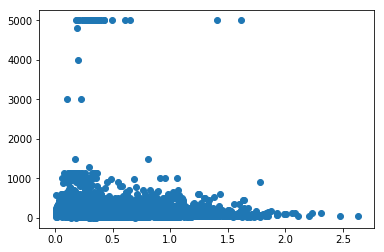

In [122]:
plt.scatter(Boston_listings3['distance_to_subway'], Boston_listings3['price'])
Boston_listings3['is_near_subway'] = Boston_listings3['distance_to_subway'].apply(lambda s: 1 if s <0.45 else 0)
Boston_listings3['is_near_subway'].value_counts()

In [123]:
# create location features
far_south = ['Hyde Park', 'West Roxbury', 'Roslindale', 'Mattapan']
middle_south = ['Jamaica Plain', 'Dorchester']
near_south = ['Mission Hill', 'Fenway', 'Longwood Medical Area', 'Roxbury', 'South Boston', 'South End']
west = ['Brighton', 'Allston']
east = ['East Boston']
north = ['Charlestown']
center = ['Downtown', 'Beacon Hill', 'Leather District', 'Chinatown', 'North End', 'West End', 
          'Bay Village', 'Back Bay', 'South Boston Waterfront']
Boston_listings3['is_far_south'] = Boston_listings3['neighbourhood_cleansed'].apply(lambda s: int(s in far_south))
Boston_listings3['is_middle_south'] = Boston_listings3['neighbourhood_cleansed'].apply(lambda s: int(s in middle_south))
Boston_listings3['is_near_south'] = Boston_listings3['neighbourhood_cleansed'].apply(lambda s: int(s in near_south))
Boston_listings3['is_west'] = Boston_listings3['neighbourhood_cleansed'].apply(lambda s: int(s in west))
Boston_listings3['is_east'] = Boston_listings3['neighbourhood_cleansed'].apply(lambda s: int(s in east))
Boston_listings3['is_north'] = Boston_listings3['neighbourhood_cleansed'].apply(lambda s: int(s in north))
Boston_listings3['is_center'] = Boston_listings3['neighbourhood_cleansed'].apply(lambda s: int(s in center))
Boston_listings3[['neighbourhood_cleansed', 'distance_to_center', 'is_far_south', 'is_middle_south', 'is_near_south', 'is_west', 'is_east', 'is_north', 'is_center','is_near_subway']].head()

,neighbourhood_cleansed,distance_to_center,is_far_south,is_middle_south,is_near_south,is_west,is_east,is_north,is_center,is_near_subway
0,East Boston,2.616808,0,0,0,0,1,0,0,0
1,Roxbury,4.338483,0,0,1,0,0,0,0,1
2,Roxbury,4.212168,0,0,1,0,0,0,0,1
3,Roslindale,9.642258,1,0,0,0,0,0,0,0
4,Downtown,0.251808,0,0,0,0,0,0,1,1


### Create amenities features

We create some amenities features, is_Wifi, is_TV, is_Washer_Dryer, and is_Kitchen:

In [124]:
# create amenities features
Boston_listings3['is_Wifi'] = Boston_listings3['amenities'].apply(lambda s: int('wifi' in str(s.lower())[1:].split(',')))
Boston_listings3['is_TV'] = Boston_listings3['amenities'].apply(lambda s: int('tv' in str(s.lower())[1:].split(',')))
Boston_listings3['is_Washer_Dryer'] = Boston_listings3['amenities'].apply(lambda s: int('dryer' in str(s.lower())[1:].split(',')))
Boston_listings3['is_Kitchen'] = Boston_listings3['amenities'].apply(lambda s: int('kitchen' in str(s.lower())[1:].split(',')))
Boston_listings3[['is_Wifi', 'is_TV', 'is_Washer_Dryer', 'is_Kitchen']].head()

,is_Wifi,is_TV,is_Washer_Dryer,is_Kitchen
0,1,1,1,1
1,1,1,1,0
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1


### Encode categorical features

Since most machine learning models can not handle categorical features directly, we have to turn nominal categorical features into features with numeric values. 

In [125]:
# check categorical features
catFeatures = ['room_type',
               'property_type',
               'bed_type']
for col in catFeatures:
    print("\n")
    print(col)
    print(Boston_listings3[col].value_counts())



room_type
Entire home/apt    4011
Private room       2072
Shared room          72
Name: room_type, dtype: int64


property_type
Apartment             4074
House                  912
Condominium            569
Serviced apartment     173
Townhouse              135
Guest suite             72
Other                   58
Loft                    49
Bed and breakfast       47
Boutique hotel          19
Boat                    14
Guesthouse               9
Villa                    7
Hotel                    5
Bungalow                 4
Camper/RV                2
Resort                   2
Chalet                   1
Barn                     1
Tiny house               1
Aparthotel               1
Name: property_type, dtype: int64


bed_type
Real Bed         6078
Futon              29
Airbed             25
Pull-out Sofa      19
Couch               4
Name: bed_type, dtype: int64


In [126]:
# encode categorical features
Boston_listings4 = Boston_listings3.copy()
Boston_listings4['room_type_Entire home/apt'] = Boston_listings4['room_type'].apply(lambda s: int(s == 'Entire home/apt'))
Boston_listings4['room_type_Private room'] = Boston_listings4['room_type'].apply(lambda s: int(s == 'Private room'))
Boston_listings4['room_type_Shared room'] = Boston_listings4['room_type'].apply(lambda s: int(s == 'Shared room'))
Boston_listings4.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_center,is_Wifi,is_TV,is_Washer_Dryer,is_Kitchen,distance_to_subway,is_near_subway,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,3781,https://www.airbnb.com/rooms/3781,20190209175027,2019-02-09,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",...,0,1,1,1,1,0.654448,0,1,0,0
1,5506,https://www.airbnb.com/rooms/5506,20190209175027,2019-02-09,**$79 Special ** Private! Minutes to center!,This is a private guest room with private bath...,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,This is a private guest room with private bath...,none,"Peacful, Architecturally interesting, historic...",...,0,1,1,1,0,0.119977,1,1,0,0
2,6695,https://www.airbnb.com/rooms/6695,20190209175027,2019-02-09,$99 Special!! Home Away! Condo,NaN,** WELCOME *** FULL PRIVATE APARTMENT In a His...,** WELCOME *** FULL PRIVATE APARTMENT In a His...,none,"Peaceful, Architecturally interesting, histori...",...,0,1,1,1,1,0.233306,1,1,0,0
3,6976,https://www.airbnb.com/rooms/6976,20190209175027,2019-02-09,Mexican Folk Art Haven in Boston Residential Area,Come stay with me in Boston's Roslindale neigh...,"This is a well-maintained, two-family house bu...",Come stay with me in Boston's Roslindale neigh...,none,The LOCATION: Roslindale is a safe and diverse...,...,0,1,1,1,1,0.771650,0,0,1,0
4,8789,https://www.airbnb.com/rooms/8789,20190209175027,2019-02-09,Curved Glass Studio/1bd facing Park,"Bright, 1 bed with curved glass windows facing...",Fully Furnished studio with enclosed bedroom. ...,"Bright, 1 bed with curved glass windows facing...",none,Beacon Hill is a historic neighborhood filled ...,...,1,1,1,1,1,0.227386,1,1,0,0


# Exploratory Data Analysis

## Numeric Variables

First, we drop the following uninformative numeric features:  

* host_acceptance_rate
  
* square_feet
  
* weekly_price
 
* monthly_price
  
* minimum_minimum_nights
  
* maximum_maximum_nights
  
* maximum_minimum_nights
  
* minimum_maximum_nights
 
* minimum_nights_avg_ntm
  
* maximum_nights_avg_ntm
  
* host_total_listings_count
  
* calculated_host_listings_count_entire_homes
 
* calculated_host_listings_count_private_rooms
  
* calculated_host_listings_count_shared_rooms 
  

After correlation analysis, the below features should be droped due to their extreme high correlations with other features:

* availability_30

* availability_60

* availability_90

* number_of_reviews

* number_of_reviews_ltm

* review_scores_accuracy
          
* review_scores_cleanliness

* review_scores_checkin

* review_scores_communication

* review_scores_location

* review_scores_value

In [160]:
# create a list of numeric variables
numVar = ['price', 
          'security_deposit', 
          'cleaning_fee', 
          'extra_people',
          'distance_to_center',
          'accommodates',
          'bathrooms',
          'bedrooms',
          'beds',
          'guests_included',
          'minimum_nights',
          'maximum_nights',
          'availability_30',
          'availability_60',
          'availability_90',
          'availability_365',
          'number_of_reviews',
          'number_of_reviews_ltm',        
          'reviews_per_month',
          'review_scores_rating',
          'review_scores_accuracy',
          'review_scores_cleanliness',
          'review_scores_checkin',
          'review_scores_communication',
          'review_scores_location',
          'review_scores_value',
          'host_listings_count',
         'distance_to_subway']

In [161]:
# check correlations
corrmat = Boston_listings4[numVar].corr()
figure = ff.create_annotated_heatmap(
         z=corrmat.values,
         x=list(corrmat.columns),
         y=list(corrmat.index),
         annotation_text=corrmat.round(2).values,
         showscale=True)
iplot(figure)

In [162]:
# create a list of numeric variables to keep
numVar_to_keep = ['price', 
                  'security_deposit', 
                  'cleaning_fee', 
                  'extra_people',
                  'distance_to_center',
                  'accommodates',
                  'bathrooms',
                  'bedrooms',
                  'beds',
                  'guests_included',
                  'minimum_nights',
                  'maximum_nights',
                  'availability_365',
                  'reviews_per_month',
                  'review_scores_rating',
                  'host_listings_count',
                  'distance_to_subway']

## Categorical Variables

Next, we drop the following uninformative categorical features:  

* host_response_time
  
* cancellation_policy
  
* host_has_profile_pic
 
* host_identity_verified
  
* is_location_exact
  
* instant_bookable
  
* require_guest_profile_picture
  
* require_guest_phone_verification

Because of one-hot-encoding, the below level to avoid collinearity:

* neighbourhood_cleansed_Leather District

* room_type_Shared room

In [130]:
# create a list of categorical variables
catVar = ['host_is_superhost', 
          'is_Wifi',
          'is_TV',
          'is_Washer_Dryer',
          'is_Kitchen',
          'is_far_south', 
          'is_middle_south', 
          'is_near_south', 
          'is_west', 
          'is_east', 
          'is_north', 
          'is_center',
          'room_type_Entire home/apt',
          'room_type_Private room',
          'room_type_Shared room',
          'is_near_subway']

In [131]:
# check categorical features
for col in catVar:
    print("\n")
    print(col)
    print(Boston_listings4[col].value_counts())



host_is_superhost
0.0    4721
1.0    1432
Name: host_is_superhost, dtype: int64


is_Wifi
1    6012
0     143
Name: is_Wifi, dtype: int64


is_TV
1    4796
0    1359
Name: is_TV, dtype: int64


is_Washer_Dryer
1    4403
0    1752
Name: is_Washer_Dryer, dtype: int64


is_Kitchen
1    5634
0     521
Name: is_Kitchen, dtype: int64


is_far_south
0    5834
1     321
Name: is_far_south, dtype: int64


is_middle_south
0    5104
1    1051
Name: is_middle_south, dtype: int64


is_near_south
0    4388
1    1767
Name: is_near_south, dtype: int64


is_west
0    5468
1     687
Name: is_west, dtype: int64


is_east
0    5844
1     311
Name: is_east, dtype: int64


is_north
0    5999
1     156
Name: is_north, dtype: int64


is_center
0    4293
1    1862
Name: is_center, dtype: int64


room_type_Entire home/apt
1    4011
0    2144
Name: room_type_Entire home/apt, dtype: int64


room_type_Private room
0    4083
1    2072
Name: room_type_Private room, dtype: int64


room_type_Shared room
0    6083
1 

In [132]:
# create a list of categorical variables to keep
catVar_to_keep = catVar

## Descriptive Statistics

After preliminary data analysis, we decide to keep 47 features. The descriptive statistics show that there are extreme or missing values for some features. For example, the minimum daily renting price is 0, and the maximum daily renting price is 5,000 (I doubt it)!

In [163]:
# keep relevant features
var_to_keep = numVar_to_keep + catVar_to_keep
Boston_listings5 = Boston_listings4[var_to_keep]
Boston_listings5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Data columns (total 33 columns):
price                        6155 non-null float64
security_deposit             4280 non-null float64
cleaning_fee                 5176 non-null float64
extra_people                 6155 non-null float64
distance_to_center           6155 non-null float64
accommodates                 6155 non-null int64
bathrooms                    6150 non-null float64
bedrooms                     6149 non-null float64
beds                         6152 non-null float64
guests_included              6155 non-null int64
minimum_nights               6155 non-null int64
maximum_nights               6155 non-null int64
availability_365             6155 non-null int64
reviews_per_month            4911 non-null float64
review_scores_rating         4856 non-null float64
host_listings_count          6153 non-null float64
distance_to_subway           6155 non-null float64
host_is_superhost            6153 no

In [164]:
# describe numeric variables
Boston_listings5.describe().T

,count,mean,std,min,25%,50%,75%,max
price,6155.0,206.795126,3.754239e+02,0.000000,83.000000,150.000000,220.000000,5.000000e+03
security_deposit,4280.0,196.570561,3.179056e+02,0.000000,0.000000,100.000000,300.000000,5.000000e+03
cleaning_fee,5176.0,73.192427,4.881477e+01,0.000000,35.000000,70.000000,100.000000,4.950000e+02
extra_people,6155.0,11.451990,2.033980e+01,0.000000,0.000000,0.000000,20.000000,3.000000e+02
distance_to_center,6155.0,3.958259,2.839366e+00,0.086062,1.737084,3.189664,5.862360,1.488431e+01
accommodates,6155.0,3.407311,2.175956e+00,1.000000,2.000000,3.000000,4.000000,1.600000e+01
bathrooms,6150.0,1.268049,5.111175e-01,0.000000,1.000000,1.000000,1.500000,6.000000e+00
bedrooms,6149.0,1.351114,9.266306e-01,0.000000,1.000000,1.000000,2.000000,8.000000e+00
beds,6152.0,1.844603,1.355363e+00,1.000000,1.000000,1.000000,2.000000,1.900000e+01
guests_included,6155.0,1.708855,1.388253e+00,1.000000,1.000000,1.000000,2.000000,1.600000e+01


In [165]:
# check correlations
Boston_listings5.corr()

,price,security_deposit,cleaning_fee,extra_people,distance_to_center,accommodates,bathrooms,bedrooms,beds,guests_included,...,is_middle_south,is_near_south,is_west,is_east,is_north,is_center,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,is_near_subway
price,1.000000,0.116430,0.309341,-0.058643,-0.147383,0.411253,0.249534,0.317260,0.451371,0.174148,...,-0.066108,0.048786,-0.076635,-0.048791,0.008233,0.114820,0.240892,-0.233392,-0.041666,0.095007
security_deposit,0.116430,1.000000,0.346769,0.092765,-0.064016,0.126627,0.103985,0.158331,0.145646,0.183791,...,-0.021551,-0.027715,-0.004663,-0.048468,0.004095,0.088049,0.165929,-0.162857,-0.023122,0.002227
cleaning_fee,0.309341,0.346769,1.000000,-0.033796,-0.300806,0.504334,0.292817,0.442135,0.443389,0.337736,...,-0.163663,0.042085,-0.095708,-0.108645,0.030354,0.258723,0.574091,-0.556970,-0.103235,0.142794
extra_people,-0.058643,0.092765,-0.033796,1.000000,0.037378,0.057639,0.013646,0.053696,0.054884,0.261847,...,0.036704,-0.041967,0.044483,0.033606,-0.016036,-0.034392,-0.094614,0.089281,0.026855,-0.075941
distance_to_center,-0.147383,-0.064016,-0.300806,0.037378,1.000000,-0.081559,0.041216,0.060127,-0.006350,-0.032982,...,0.375032,-0.133546,0.374526,-0.059099,-0.093564,-0.648848,-0.393603,0.391626,0.022902,-0.360243
accommodates,0.411253,0.126627,0.504334,0.057639,-0.081559,1.000000,0.438084,0.760308,0.864856,0.501397,...,-0.005970,0.027446,-0.079160,0.009657,0.027774,0.042849,0.473675,-0.458396,-0.084259,0.009029
bathrooms,0.249534,0.103985,0.292817,0.013646,0.041216,0.438084,1.000000,0.498554,0.456807,0.205527,...,0.038513,0.059402,-0.002171,-0.029567,0.055006,-0.080746,0.043499,-0.048707,0.021298,-0.059049
bedrooms,0.317260,0.158331,0.442135,0.053696,0.060127,0.760308,0.498554,1.000000,0.729229,0.427900,...,0.065733,0.002187,-0.007920,0.012658,0.067225,-0.075564,0.247796,-0.240441,-0.041248,-0.077982
beds,0.451371,0.145646,0.443389,0.054884,-0.006350,0.864856,0.456807,0.729229,1.000000,0.431226,...,0.051379,0.036701,-0.064830,-0.003105,0.028413,-0.030500,0.336899,-0.336928,-0.012057,-0.029983
guests_included,0.174148,0.183791,0.337736,0.261847,-0.032982,0.501397,0.205527,0.427900,0.431226,1.000000,...,0.004664,-0.054988,0.031971,0.001895,0.007759,0.034681,0.261817,-0.252318,-0.051202,-0.025488


## Price Check

As we see, the distribution of the price is right skewed due to high-end outliers. After examing listings, listings with 0 or greater than 799 (97.5% percentile) prices are not accurate.    

In [136]:
# plot a histogram of price
trace = go.Histogram(x=Boston_listings5['price'],
                     marker=dict(color="green"))

layout = go.Layout(xaxis=dict(title="Price"),
                   yaxis=dict(title="Num of Listings"),
                   title="Histogram of Price")
data = [trace]
figure = go.Figure(data=data,layout=layout)
iplot(figure)

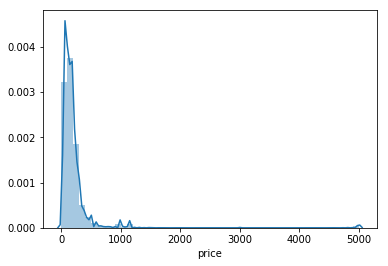

In [137]:
# check price distribution
sns.distplot(Boston_listings5['price'])
plt.show()

In [138]:
# find percentiles for price
Boston_listings5['price'].quantile(np.linspace(0.025, 1, 39 ,0))

0.025     35.0
0.050     40.0
0.075     48.0
0.100     50.0
0.125     56.0
0.150     61.0
0.175     68.0
0.200     74.0
0.225     76.0
0.250     83.0
0.275     90.0
0.300     98.0
0.325    100.0
0.350    100.0
0.375    110.0
0.400    120.0
0.425    125.0
0.450    133.0
0.475    143.0
0.500    150.0
0.525    150.0
0.550    160.0
0.575    170.0
0.600    175.0
0.625    181.0
0.650    189.0
0.675    195.0
0.700    200.0
0.725    202.0
0.750    220.0
0.775    230.0
0.800    249.0
0.825    259.0
0.850    283.0
0.875    299.0
0.900    325.0
0.925    379.0
0.950    495.0
0.975    799.0
Name: price, dtype: float64

In [139]:
# check high-end rooms
upperBound = Boston_listings5['price'].quantile(0.975)
Boston_listings4[['id', 'listing_url', 'name', 'price']][Boston_listings4['price'] > upperBound].sort_values('price', ascending = False)

,id,listing_url,name,price
3452,21678120,https://www.airbnb.com/rooms/21678120,Stayloom’s Remastered Retreat | near Fenway,5000.0
2316,17138041,https://www.airbnb.com/rooms/17138041,Stayloom's Downtown Destination | near Back Bay,5000.0
5532,29682207,https://www.airbnb.com/rooms/29682207,Stayloom's Charming Upscale Duplex | near T,5000.0
2767,19160270,https://www.airbnb.com/rooms/19160270,Stayloom's Saltspray Luxury | Beachfront,5000.0
2754,19141729,https://www.airbnb.com/rooms/19141729,Stayloom’s Saltspray Escape | Beachfront,5000.0
2746,19115873,https://www.airbnb.com/rooms/19115873,"Stayloom’s Upscale Oasis | Private deck, near T",5000.0
3857,22794472,https://www.airbnb.com/rooms/22794472,Stayloom’s Bright Buttonwood House | near T,5000.0
3861,22814449,https://www.airbnb.com/rooms/22814449,Stayloom’s Charming Home | near T,5000.0
3862,22814686,https://www.airbnb.com/rooms/22814686,Stayloom’s Upscale Destination | near T,5000.0
5534,29682306,https://www.airbnb.com/rooms/29682306,Stayloom's Darling Luxury Apartment | near T,5000.0


In [140]:
# check low-end rooms
Boston_listings4[['id', 'listing_url', 'name', 'price']][Boston_listings4['price'] == 0].sort_values('price', ascending = False)

,id,listing_url,name,price
3041,20268369,https://www.airbnb.com/rooms/20268369,Large Private Bedroom Close to Airport,0.0
3054,20349970,https://www.airbnb.com/rooms/20349970,"Walk To The Beach or City, room 7",0.0
3303,21237147,https://www.airbnb.com/rooms/21237147,West Rutland Square 1 bedroom PERFECTION!,0.0


# Data Cleaning

## Exclude Extreme and Missing Values

Now it is time to exclude extreme and missing values. The resulting data has covers 3,413 listings. The descriptive statistics looks more reasonable.  

In [166]:
# exclude extreme prices
Boston_listings6 = Boston_listings5[(Boston_listings5['price'] > 0) & (Boston_listings5['price'] <= upperBound)]
Boston_listings6.shape

(5999, 33)

In [167]:
# delete missing values
Boston_listings7= Boston_listings6.dropna()
Boston_listings7.shape

(3413, 33)

In [168]:
# describe numeric variables
Boston_listings7.describe().T

,count,mean,std,min,25%,50%,75%,max
price,3413.0,165.062701,107.388311,10.000000,85.000000,150.000000,200.000000,793.000000
security_deposit,3413.0,201.535013,299.529912,0.000000,0.000000,100.000000,300.000000,5000.000000
cleaning_fee,3413.0,70.922356,48.447971,0.000000,35.000000,69.000000,100.000000,495.000000
extra_people,3413.0,15.119836,21.490312,0.000000,0.000000,10.000000,25.000000,300.000000
distance_to_center,3413.0,3.956817,2.861771,0.086062,1.706904,3.096394,5.907249,14.833790
accommodates,3413.0,3.596543,2.237342,1.000000,2.000000,3.000000,4.000000,16.000000
bathrooms,3413.0,1.271462,0.515226,0.000000,1.000000,1.000000,1.500000,5.000000
bedrooms,3413.0,1.389979,0.942661,0.000000,1.000000,1.000000,2.000000,6.000000
beds,3413.0,1.915910,1.325959,1.000000,1.000000,1.000000,2.000000,16.000000
guests_included,3413.0,1.960738,1.499388,1.000000,1.000000,1.000000,2.000000,16.000000


In [169]:
# check correlations
Boston_listings7.corr()

,price,security_deposit,cleaning_fee,extra_people,distance_to_center,accommodates,bathrooms,bedrooms,beds,guests_included,...,is_middle_south,is_near_south,is_west,is_east,is_north,is_center,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,is_near_subway
price,1.000000,0.227691,0.571801,-0.007209,-0.342939,0.547580,0.296419,0.490828,0.482359,0.380389,...,-0.189545,0.101669,-0.134562,-0.098897,0.077561,0.258644,0.564166,-0.551766,-0.088602,0.150677
security_deposit,0.227691,1.000000,0.372077,0.080142,-0.095633,0.134269,0.080709,0.147286,0.134515,0.223218,...,-0.040167,-0.021175,-0.008466,-0.050981,-0.011425,0.120963,0.211529,-0.207434,-0.030078,0.034525
cleaning_fee,0.571801,0.372077,1.000000,0.009618,-0.280402,0.510398,0.259072,0.457788,0.459962,0.409919,...,-0.164629,0.034093,-0.044032,-0.111058,0.025999,0.246815,0.556475,-0.544543,-0.085701,0.112879
extra_people,-0.007209,0.080142,0.009618,1.000000,0.023865,0.037884,0.015497,0.051020,0.047872,0.203225,...,0.019839,-0.009330,0.036939,-0.003136,-0.021472,-0.026068,-0.097293,0.091641,0.035208,-0.028430
distance_to_center,-0.342939,-0.095633,-0.280402,0.023865,1.000000,-0.042117,0.096422,0.088359,0.021855,-0.028267,...,0.384136,-0.145444,0.368348,-0.060973,-0.098779,-0.646061,-0.381882,0.381627,0.013829,-0.366241
accommodates,0.547580,0.134269,0.510398,0.037884,-0.042117,1.000000,0.381834,0.798628,0.890447,0.571284,...,0.002908,0.007696,-0.041556,-0.018788,0.039723,0.026868,0.460952,-0.450115,-0.076396,-0.013120
bathrooms,0.296419,0.080709,0.259072,0.015497,0.096422,0.381834,1.000000,0.456618,0.394003,0.238965,...,0.039518,0.040520,0.055486,-0.019434,0.072083,-0.127522,-0.027174,0.022725,0.026114,-0.101756
bedrooms,0.490828,0.147286,0.457788,0.051020,0.088359,0.798628,0.456618,1.000000,0.778924,0.524670,...,0.087349,-0.001796,0.011094,0.002334,0.065496,-0.106704,0.270673,-0.266210,-0.034081,-0.111815
beds,0.482359,0.134515,0.459962,0.047872,0.021855,0.890447,0.394003,0.778924,1.000000,0.526386,...,0.043454,0.025748,-0.033642,-0.022744,0.048766,-0.043991,0.358613,-0.351581,-0.051502,-0.062581
guests_included,0.380389,0.223218,0.409919,0.203225,-0.028267,0.571284,0.238965,0.524670,0.526386,1.000000,...,0.004073,-0.037666,0.048605,-0.005434,0.000739,0.016683,0.326767,-0.319748,-0.050397,-0.015482


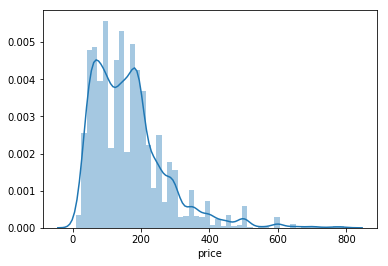

In [170]:
# check price distribution
sns.distplot(Boston_listings7['price'])
plt.show()

## Seperate Features and Targets

For model building, we need to seperate features and targets.

In [146]:
# create the target vector
y = Boston_listings7.iloc[:, Boston_listings7.columns == 'price']
y.shape

(3413, 1)

In [200]:
# create the features matrix
X = Boston_listings7.iloc[:, Boston_listings7.columns != 'price']
X.shape

(3413, 32)

## Split Data into Training and Test Sets

Next, we will split data into training and test sets. To get better prediction preformance, we also standardize features.

In [201]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print('Training Features Shape:', X_train.shape)
print('Training Lable Shape:', y_train.shape)
print('Test Features Shape:', X_test.shape)
print('Test Lable Shape:', y_test.shape)

('Training Features Shape:', (2559, 32))
('Training Lable Shape:', (2559, 1))
('Test Features Shape:', (854, 32))
('Test Lable Shape:', (854, 1))


In [202]:
# fit standardizer to training set
standardizer = StandardScaler()
standardizer.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [203]:
# apply to both training and test sets
X_trian_std = standardizer.transform(X_train)
X_test_std = standardizer.transform(X_test)

In [204]:
# covert labels to arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Machine Learning Model - Lasso Regression

Now that we have explored and prepared the data, it's time to get down to modeling. Since we are interested in trying to predict the price of a rental property, this is essentially a regression problem.

First, we will model the renting price with [Lasso Regression](https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b) and examine the regularization parameter on coefficients of coefficients. R-squared score is quite decent (0.6).

In [205]:
# create a base Lasso Regression model
base_lasso = Lasso()

Text(0,0.5,'weights')

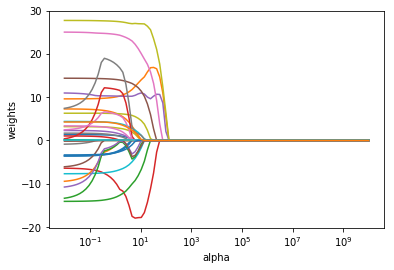

In [206]:
# examine effect Of alpha on Lasso Regression
alphas = 10**np.linspace(10,-2,100)*0.5
coefs = []
for a in alphas:
    base_lasso.set_params(alpha=a)
    base_lasso.fit(X_trian_std, y_train)
    coefs.append(base_lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [207]:
# examine effect Of alpha on coefficients
alphas = [0.05, 0.1, 0.25, 0.5, 0.75, 1, 5, 10, 20, 30, 40, 50]
coef_df = pd.DataFrame()
coef_df['Feature'] = X.columns
mse = []
for a in alphas:
    base_lasso.set_params(alpha=a)
    base_lasso.fit(X_trian_std, y_train)
    column_name = 'Alpha=%f' % a
    coef_df[column_name] = base_lasso.coef_
    y_pred_lasso = base_lasso.predict(X_test_std)
    mse.append(mean_squared_error(y_test, y_pred_lasso))
    
coef_df

,Feature,Alpha=0.050000,Alpha=0.100000,Alpha=0.250000,Alpha=0.500000,Alpha=0.750000,Alpha=1.000000,Alpha=5.000000,Alpha=10.000000,Alpha=20.000000,Alpha=30.000000,Alpha=40.000000,Alpha=50.000000
0,security_deposit,1.317569,1.296112,1.242737,1.152296,1.061787,0.937490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,cleaning_fee,9.629110,9.667328,9.798481,10.017068,10.235795,10.502512,13.896426,16.124644,16.814779,14.139205,9.984675,5.414896
2,extra_people,0.102027,0.047934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
3,distance_to_center,-6.715663,-7.031955,-8.035709,-9.650767,-11.262843,-11.718099,-17.823976,-13.605010,-4.212205,-0.000000,-0.000000,-0.000000
4,accommodates,10.611823,10.308497,10.285183,10.249099,10.213100,10.206900,11.011918,9.800018,10.677889,10.603532,7.489413,2.055412
5,bathrooms,14.335931,14.301447,14.223473,14.097579,13.971696,13.830818,11.613829,7.940185,0.000000,0.000000,0.000000,0.000000
6,bedrooms,24.907739,24.796078,24.687348,24.504193,24.320848,24.078490,20.342184,17.253240,10.690933,2.884155,0.000000,0.000000
7,beds,-0.411058,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,guests_included,3.157239,3.137313,3.071591,2.934438,2.797312,2.680252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,minimum_nights,-7.654310,-7.594324,-7.408241,-7.099648,-6.791101,-6.512112,-2.051759,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000


In [208]:
# examine effect Of alpha on MSE
mse_df = pd.DataFrame({'Alpha':alphas,'MSE':mse})
mse_df

,Alpha,MSE
0,0.05,4544.460590
1,0.10,4542.716302
2,0.25,4540.702513
3,0.50,4540.017447
4,0.75,4543.180806
5,1.00,4545.253566
6,5.00,4713.096586
7,10.00,5090.883719
8,20.00,5985.072970
9,30.00,6999.034642


In [209]:
# fit model using the best parameters
base_lasso.set_params(alpha=0.5)
base_lasso.fit(X_trian_std, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [210]:
# predict test data
y_pred_lasso = base_lasso.predict(X_test_std)

In [211]:
# caculate MSE, MAE, MAPE, and Accuracy
errors = abs(y_pred_lasso - y_test)
mae = round(np.mean(errors), 2)
mape = round(np.mean(100 * (errors / y_test)), 2)
accuracy = 100 - mape
print('Mean Squared Error: ', round(mean_squared_error(y_test, y_pred_lasso), 2))
print('Mean Absolute Error: ', mae)
print('Mean Absolute Percentage Error: ', mape)
print('Accuracy: ', accuracy, "%")
print('R-squared: ', round(r2_score(y_test, y_pred_lasso), 2))

('Mean Squared Error: ', 4540.02)
('Mean Absolute Error: ', 45.51)
('Mean Absolute Percentage Error: ', 35.39)
('Accuracy: ', 64.61, '%')
('R-squared: ', 0.6)


In [212]:
# print a dataframe of feature parameters
coef_df[['Feature', 'Alpha=0.100000']]

,Feature,Alpha=0.100000
0,security_deposit,1.296112
1,cleaning_fee,9.667328
2,extra_people,0.047934
3,distance_to_center,-7.031955
4,accommodates,10.308497
5,bathrooms,14.301447
6,bedrooms,24.796078
7,beds,-0.000000
8,guests_included,3.137313
9,minimum_nights,-7.594324


# Machine Learning Model - Random Forests Regression

Next, we will model the renting price with [Random Forests Regression](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0) and study Importance of every feature. R-squared score is better (0.71).

According to feature importances ranking, the top 10 important features include room_type, bathrooms, bedrooms, accommodates, distance_to_center, cleaning_fee, security_deposit,  reviews_per_month, availability_365, host_listings_count, as expected.

In [213]:
# create a base Random Forest model
base_rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [214]:
# train the model on training data
base_rf.fit(X_trian_std , y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [215]:
# predict test data
y_pred_rf = base_rf.predict(X_test_std)

In [216]:
# caculate MSE, MAE, MAPE, and Accuracy
errors = abs(y_pred_rf - y_test)
mae = round(np.mean(errors), 2)
mape = round(np.mean(100 * (errors / y_test)), 2)
accuracy = 100 - mape
print('Mean Squared Error: ', round(mean_squared_error(y_test, y_pred_rf), 2))
print('Mean Absolute Error: ', mae)
print('Mean Absolute Percentage Error: ', mape)
print('Accuracy: ', accuracy, "%")
print('R-squared: ', round(r2_score(y_test, y_pred_rf), 2))

('Mean Squared Error: ', 3290.23)
('Mean Absolute Error: ', 35.31)
('Mean Absolute Percentage Error: ', 25.47)
('Accuracy: ', 74.53, '%')
('R-squared: ', 0.71)


In [217]:
# create a dataframe of feature importances
feature_importances = pd.DataFrame()
feature_importances['feature'] = X.columns
feature_importances['importance'] = base_rf.feature_importances_
feature_importances_srt = feature_importances.sort_values(by='importance', ascending = False).reset_index()
feature_importances_srt

,index,feature,importance
0,28,room_type_Entire home/apt,0.313322
1,5,bathrooms,0.140474
2,3,distance_to_center,0.079285
3,1,cleaning_fee,0.071314
4,12,reviews_per_month,0.050761
5,11,availability_365,0.048868
6,15,distance_to_subway,0.036992
7,6,bedrooms,0.034770
8,14,host_listings_count,0.030619
9,0,security_deposit,0.028652


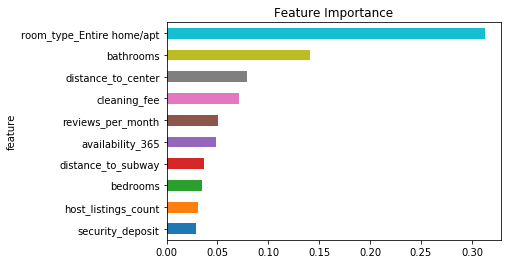

In [218]:
# plot Top important features
feature_importances_top = feature_importances_srt.iloc[0:10, :]
feature_importances_top.sort_values(by='importance', ascending = True, inplace = True)
feature_importances_top.plot(x = 'feature', y = 'importance', kind = 'barh', legend = False)
plt.title('Feature Importance')
plt.show()

# Linear Regression

## Linear Regression with Top Features

Because we are not only interested in accurate predictions, but also interested in clear interpretations. In order to make inference about the relationships between features and target, we fit a [linear regression](https://towardsdatascience.com/linear-regression-python-implementation-ae0d95348ac4) using top 10 features identified by Random Forests Regression. R-squared score is 0.55. Model results indicate there exists some multicollinearity issues.

In [219]:
# keep top features 
top_features = ['room_type_Entire home/apt',
                'room_type_Private room',
                'bathrooms', 
                'bedrooms',
                'accommodates',
                'distance_to_center',
                'cleaning_fee',
                'security_deposit',
                'reviews_per_month',
                'availability_365',
                'host_listings_count',
                'distance_to_subway']
X1 = X[top_features]

In [220]:
# create a linear regression model
X1_cons = sm.add_constant(X1)
model1_ols = sm.OLS(y, X1_cons)

In [221]:
# fit linear regression
model1_result = model1_ols.fit()

In [222]:
# display model summary
print(model1_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     347.7
Date:                Sat, 04 May 2019   Prob (F-statistic):               0.00
Time:                        12:50:33   Log-Likelihood:                -19437.
No. Observations:                3413   AIC:                         3.890e+04
Df Residuals:                    3400   BIC:                         3.898e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Linear Regression with  Features of Interested

From the perspective of a homeowner, we are more interested in property characteristics such as room_type, bathrooms, bedrooms, and location. So we fit a linear regression using property characteristics again. In the reduced model, R-squared score is just slightly lower (0.53). But we get rid of multicollinearity issues successfully. 

Results show all property characteristics are statistically significant. More importantly, the coefficient estimates can assist us to evaluate the influence of each property characteristics on Airbnb daily renting price. For example, customer are willing to pay $38.13 for one bedroom.

In [193]:
# keep features of interested  
features_of_interested = ['bathrooms', 
                          'bedrooms',
                          'room_type_Entire home/apt',
                          'room_type_Private room',                          
                          'is_middle_south', 
                          'is_near_south', 
                          'is_west', 
                          'is_east',
                          'is_north',
                          'is_center',
                          'is_near_subway']
X2 = X[features_of_interested]

In [194]:
# create a linear regression model
X2_cons = sm.add_constant(X2)
model2_ols = sm.OLS(y, X2_cons)

In [195]:
# fit linear regression
model2_result = model2_ols.fit()

In [196]:
# display model summary
print(model2_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     349.8
Date:                Sat, 04 May 2019   Prob (F-statistic):               0.00
Time:                        12:44:06   Log-Likelihood:                -19512.
No. Observations:                3413   AIC:                         3.905e+04
Df Residuals:                    3401   BIC:                         3.912e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Prediction based on Linear Regression with Features of Interested

Based on the above linear regression using property characteristics, we make predictions on various scenarios. Prediction results give estimated Airbnb daily renting price for different property characteristics. For instance, the estimated Airbnb daily renting price, for 1B1B apartment in downtown, is 199.59.

In [215]:
# load data for prediction
data_for_prediction = pd.read_csv('/Users/mengphilshen/Dropbox/Project/Data_Challenges/Proj_Airbnb/data/Boston/data_for_prediction.csv')
data_for_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 11 columns):
const                        192 non-null int64
bathrooms                    192 non-null int64
bedrooms                     192 non-null int64
room_type_Entire home/apt    192 non-null int64
room_type_Private room       192 non-null int64
is_middle_south              192 non-null int64
is_near_south                192 non-null int64
is_west                      192 non-null int64
is_east                      192 non-null int64
is_north                     192 non-null int64
is_center                    192 non-null int64
dtypes: int64(11)
memory usage: 16.6 KB


In [216]:
# make prediction based on Linear Regression with Features of Interested
model2_prediction = model2_result.predict(data_for_prediction)
prediction = data_for_prediction.assign(predicted_price = model2_prediction)
prediction.head(20)

,const,bathrooms,bedrooms,room_type_Entire home/apt,room_type_Private room,is_middle_south,is_near_south,is_west,is_east,is_north,is_center,predicted_price
0,1,1,1,1,0,1,0,0,0,0,0,136.741056
1,1,1,1,1,0,0,1,0,0,0,0,180.368893
2,1,1,1,1,0,0,0,1,0,0,0,134.500022
3,1,1,1,1,0,0,0,0,1,0,0,135.287626
4,1,1,1,1,0,0,0,0,0,1,0,190.674453
5,1,1,1,1,0,0,0,0,0,0,1,199.589133
6,1,1,1,0,1,1,0,0,0,0,0,53.106381
7,1,1,1,0,1,0,1,0,0,0,0,96.734219
8,1,1,1,0,1,0,0,1,0,0,0,50.865347
9,1,1,1,0,1,0,0,0,1,0,0,51.652951


In [219]:
# output prediction for web-based analytics application
prediction.to_csv('/Users/mengphilshen/Dropbox/Project/Data_Challenges/Proj_Airbnb/data/Boston/prediction.csv')

# Conclusion

Through the data analysis, we gained interesting insights into the Boston's Airbnb rental market. For the question that we wished to answer at the beginning, we find that room type, size, and location are key drivers of rental price. 

From the insights we have derived, we would like to build a web-based analytics application to assist Boston-based property investors’ decision making process.